In [1]:
%load_ext autoreload
%autoreload 2

import torch
import os
from resnet_module import ResNetModel
import torchmetrics.classification

from resnet_training import get_predictions, calculate_gender_bias, calculate_age_bias, calculate_hairiness_bias, calculate_skin_tone_bias, get_auc_scores

wandb: Currently logged in as: jacob314. Use `wandb login --relogin` to force relogin


In [2]:
simple_binary_debias = ["folm5wbd", "00riantl", "uiznsjjj", "30y8q6vf", "hi6ej7fl", "nl10rh1v", "xfh2oa3v", "i8zwc0lj", "062eb1li", "79uu4gax"]
simple_binary = ["kzozqfbw", "kdt4bf3x", "k7w8ngzr", "w572bz9r", "9e0j4szk", "3x8qz40u", "n3w92l9t", "ylc3xokv", "w2fevh40", "5guuqk3t"]

transfer_binary_debias = ["qoyvvmq3", "b4uy5hgy", "wagobkkx", "hs8iabty", "zknbfdl9", "7mh9iye3", "4vyhypbd", "fiwk3grk", "jv3m25z9", "ilhohkk0"]
transfer_binary = ["qmfpk3sj", "fstine2p", "8qrajii5", "fnyejif7", "yxar8zfy", "8mqtiupc", "jffizh6w", "rojiogbi", "gtc4c11b", "teurz8xp"]

multi_debias = ["l47c03l0", "1ldrdigg", "wx15lpd9", "miao7bd6", "nthtz4o2", "2bipf0jy", "jk959q53", "cgm7fzfj", "7jdsmgev", "uk0cgdr5"]
multi = ["nrdciusi", "q3knp3c5", "f47gne83", "ob5ydwmr", "043j12dt", "s60045hq", "4k9wi94n", "z59xq6lu", "8li362df", "48r7talu"] 

debiasing_runs = simple_binary_debias
no_debiasing_runs = simple_binary

In [ ]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
num_classes=2
metric = torchmetrics.classification.MulticlassAccuracy(num_classes=num_classes, average='weighted')


results = {}

all_runs = debiasing_runs + no_debiasing_runs

for run in all_runs:
    print(f"Measuring biases for run {run}")
    results[run] = {}
    checkpoint_dir = f'./bias-skin-lesion-detection/{run}/checkpoints/'
    file_name = os.listdir(checkpoint_dir)[0]
    model_path = os.path.join(checkpoint_dir, file_name)
    
    model = ResNetModel.load_from_checkpoint(model_path, map_location=device)
    predictions, all_labels = get_predictions(model, num_classes=num_classes)
    gender_bias = calculate_gender_bias(predictions, all_labels, metric, num_classes=num_classes)
    results[run].update(gender_bias)
    age_bias = calculate_age_bias(predictions, all_labels, metric, num_classes=num_classes)
    results[run].update(age_bias)

    hairiness_bias = calculate_hairiness_bias(predictions, all_labels, metric, num_classes=num_classes)
    results[run].update(hairiness_bias)

    skin_tone_bias = calculate_skin_tone_bias(predictions, all_labels, metric, num_classes=num_classes)
    results[run].update(skin_tone_bias)
    
    class_labels = []
    for label in all_labels:
        class_labels.append(label[0].item())
    
    overall_accuracy = metric(predictions, torch.tensor(class_labels)).item()
    print(f"overall_acc: {overall_accuracy}")
    results[run].update({"overall_acc": overall_accuracy})


In [ ]:
print(results)

In [3]:
num_classes = 2
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

results = {}

all_runs = debiasing_runs + no_debiasing_runs

for run in all_runs:
    print(f"Measuring auc scores for run {run}")
    results[run] = {}
    checkpoint_dir = f'./bias-skin-lesion-detection/{run}/checkpoints/'
    file_name = os.listdir(checkpoint_dir)[0]
    model_path = os.path.join(checkpoint_dir, file_name)
    
    model = ResNetModel.load_from_checkpoint(model_path, map_location=device)
    predictions, all_labels = get_predictions(model, num_classes=num_classes)
    
    results[run].update(get_auc_scores(predictions, all_labels, num_classes=num_classes))

Measuring auc scores for run folm5wbd


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-3.1118,  5.0097],
        [ 1.3169,  4.4315],
        [ 3.5710,  1.5823],
        ...,
        [ 2.6514,  2.7724],
        [ 2.9733,  2.6454],
        [ 2.3428,  3.2656]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7750274538993835, 'Type I': 0.6441837549209595, 'Type II': 0.7074970006942749, 'Type III': 0.8755755424499512, 'Hair': 0.6857142448425293, 'No Hair': 0.7859720587730408}
Measuring auc scores for run 00riantl


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-3.7943,  5.9256],
        [ 1.0814,  3.9845],
        [ 2.5712,  1.7375],
        ...,
        [ 2.5589,  2.1950],
        [ 2.2308,  2.7083],
        [ 1.4724,  3.2091]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7854785919189453, 'Type I': 0.7214076519012451, 'Type II': 0.7111465930938721, 'Type III': 0.8841508030891418, 'Hair': 0.7690476775169373, 'No Hair': 0.7879841327667236}
Measuring auc scores for run uiznsjjj


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-3.1459,  5.3627],
        [ 1.2910,  4.8931],
        [ 3.5367,  1.3197],
        ...,
        [ 2.5041,  3.3665],
        [ 3.1241,  2.4141],
        [ 1.4706,  4.1205]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.8014011383056641, 'Type I': 0.6871945858001709, 'Type II': 0.7582116723060608, 'Type III': 0.8786953687667847, 'Hair': 0.714285671710968, 'No Hair': 0.8119450807571411}
Measuring auc scores for run 30y8q6vf


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-3.0151,  4.8456],
        [ 1.4885,  4.2773],
        [ 3.2017,  0.8620],
        ...,
        [ 2.1836,  2.8593],
        [ 2.7456,  2.5589],
        [ 1.5830,  3.3002]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7876787781715393, 'Type I': 0.7033236026763916, 'Type II': 0.7208789587020874, 'Type III': 0.8768101334571838, 'Hair': 0.778571367263794, 'No Hair': 0.7892278432846069}
Measuring auc scores for run hi6ej7fl


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-4.6797,  5.4456],
        [ 1.6692,  4.5287],
        [ 3.3980,  1.4467],
        ...,
        [ 2.2643,  3.1110],
        [ 3.0549,  2.7478],
        [ 1.8982,  3.6903]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.799895703792572, 'Type I': 0.6788855791091919, 'Type II': 0.757508397102356, 'Type III': 0.8700534105300903, 'Hair': 0.6579365134239197, 'No Hair': 0.8170909881591797}
Measuring auc scores for run nl10rh1v


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-2.4108,  5.5262],
        [ 0.6386,  4.1218],
        [ 2.4101,  1.7880],
        ...,
        [ 2.3558,  2.7800],
        [ 2.4674,  2.5126],
        [ 1.5439,  3.0590]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7728562355041504, 'Type I': 0.6559139490127563, 'Type II': 0.6937918066978455, 'Type III': 0.8810977935791016, 'Hair': 0.778571367263794, 'No Hair': 0.7725831866264343}
Measuring auc scores for run xfh2oa3v


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-1.7481,  5.2349],
        [ 1.4238,  4.0086],
        [ 2.9238,  1.9242],
        ...,
        [ 2.4549,  2.6522],
        [ 2.3383,  3.1899],
        [ 1.6517,  3.7519]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7854496240615845, 'Type I': 0.670087993144989, 'Type II': 0.702820897102356, 'Type III': 0.8927260041236877, 'Hair': 0.7595237493515015, 'No Hair': 0.7890815734863281}
Measuring auc scores for run i8zwc0lj


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-3.1160,  4.7537],
        [ 0.5572,  3.8015],
        [ 2.7522,  1.2063],
        ...,
        [ 2.1415,  1.9120],
        [ 1.6074,  2.7069],
        [ 0.9882,  2.7439]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7823519110679626, 'Type I': 0.696969747543335, 'Type II': 0.7135797142982483, 'Type III': 0.8706372976303101, 'Hair': 0.7507936358451843, 'No Hair': 0.7864354848861694}
Measuring auc scores for run 062eb1li


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-3.1690,  5.8606],
        [ 0.9185,  4.3186],
        [ 2.3306,  1.7863],
        ...,
        [ 2.3069,  2.9729],
        [ 2.8047,  2.3825],
        [ 1.3846,  3.1474]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7969428300857544, 'Type I': 0.7047898173332214, 'Type II': 0.7404767274856567, 'Type III': 0.8718719482421875, 'Hair': 0.6904762387275696, 'No Hair': 0.8097869157791138}
Measuring auc scores for run 79uu4gax


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-3.0490,  5.1989],
        [ 1.7849,  4.7540],
        [ 3.3800,  1.0526],
        ...,
        [ 2.4964,  3.4123],
        [ 2.7942,  3.1080],
        [ 2.1355,  3.6266]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7981008291244507, 'Type I': 0.7130987644195557, 'Type II': 0.737207293510437, 'Type III': 0.8798632025718689, 'Hair': 0.7698413133621216, 'No Hair': 0.8016778826713562}
Measuring auc scores for run kzozqfbw


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-4.8891,  6.6146],
        [ 1.8577,  4.2863],
        [ 3.6557,  0.7891],
        ...,
        [ 2.8329,  2.8246],
        [ 3.0685,  2.8514],
        [ 2.2500,  2.2084]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7930055856704712, 'Type I': 0.659824013710022, 'Type II': 0.7418262958526611, 'Type III': 0.8730396628379822, 'Hair': 0.7730159163475037, 'No Hair': 0.7956541180610657}
Measuring auc scores for run kdt4bf3x


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-4.3427,  4.5819],
        [ 1.1038,  3.4243],
        [ 3.0662,  2.1950],
        ...,
        [ 2.4576,  1.9656],
        [ 2.5028,  2.0070],
        [ 1.8128,  1.8459]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.8014011383056641, 'Type I': 0.6759530901908875, 'Type II': 0.7555314898490906, 'Type III': 0.8785618543624878, 'Hair': 0.7547619342803955, 'No Hair': 0.8070188164710999}
Measuring auc scores for run k7w8ngzr


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-4.4453,  5.1640],
        [ 1.4648,  3.2465],
        [ 3.4004,  0.8455],
        ...,
        [ 2.3778,  1.9077],
        [ 2.4136,  2.3494],
        [ 2.0545,  2.1363]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.799519419670105, 'Type I': 0.6955034136772156, 'Type II': 0.7228748798370361, 'Type III': 0.895061731338501, 'Hair': 0.761904776096344, 'No Hair': 0.804848313331604}
Measuring auc scores for run w572bz9r


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-3.4205,  5.1595],
        [ 1.6963,  4.1203],
        [ 2.1554,  2.2249],
        ...,
        [ 2.6292,  2.5272],
        [ 2.8989,  2.3774],
        [ 1.8659,  2.2294]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.8006774187088013, 'Type I': 0.6436949968338013, 'Type II': 0.7567480206489563, 'Type III': 0.8829162120819092, 'Hair': 0.7365079522132874, 'No Hair': 0.8082625865936279}
Measuring auc scores for run 9e0j4szk


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-4.5086,  4.6756],
        [ 1.5817,  3.6706],
        [ 2.7417,  1.8848],
        ...,
        [ 2.7584,  1.9789],
        [ 2.4406,  2.3979],
        [ 2.1933,  2.1456]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7879971861839294, 'Type I': 0.6417399644851685, 'Type II': 0.7223616242408752, 'Type III': 0.8803136944770813, 'Hair': 0.7579364776611328, 'No Hair': 0.7920934557914734}
Measuring auc scores for run 3x8qz40u


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-3.8916,  6.3858],
        [ 1.9190,  3.8585],
        [ 3.1317,  2.0934],
        ...,
        [ 3.0719,  2.7764],
        [ 3.0312,  2.8799],
        [ 2.8410,  2.2556]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7830756306648254, 'Type I': 0.6544477343559265, 'Type II': 0.7240914106369019, 'Type III': 0.8717384338378906, 'Hair': 0.7253968119621277, 'No Hair': 0.790532648563385}
Measuring auc scores for run n3w92l9t


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-6.7822,  7.1407],
        [ 1.9317,  3.9982],
        [ 3.3234,  1.9326],
        ...,
        [ 2.8082,  2.6891],
        [ 2.9073,  2.7209],
        [ 2.6579,  2.7492]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7799780368804932, 'Type I': 0.6133919954299927, 'Type II': 0.731390655040741, 'Type III': 0.8729730248451233, 'Hair': 0.7253968119621277, 'No Hair': 0.7871061563491821}
Measuring auc scores for run ylc3xokv


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-2.6451,  5.5291],
        [ 1.8575,  3.6847],
        [ 2.2978,  2.0620],
        ...,
        [ 2.7842,  2.3339],
        [ 2.9330,  2.3729],
        [ 1.9854,  2.9056]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7966532707214355, 'Type I': 0.6769306063652039, 'Type II': 0.7447726726531982, 'Type III': 0.8791458606719971, 'Hair': 0.7730159163475037, 'No Hair': 0.799702525138855}
Measuring auc scores for run w2fevh40


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-3.4941,  5.5706],
        [ 2.6323,  4.1643],
        [ 3.4391,  2.1750],
        ...,
        [ 3.1396,  2.9610],
        [ 3.3016,  3.0574],
        [ 2.5170,  2.3871]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7814544439315796, 'Type I': 0.6446725726127625, 'Type II': 0.7108994722366333, 'Type III': 0.8840840458869934, 'Hair': 0.6984128355979919, 'No Hair': 0.7916178703308105}
Measuring auc scores for run 5guuqk3t


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, yo

Predicting: 0it [00:00, ?it/s]

tensor([[-7.7547,  5.7498],
        [ 1.7833,  3.9921],
        [ 1.5265,  1.9047],
        ...,
        [ 2.9731,  1.6736],
        [ 3.1475,  1.9934],
        [ 1.9446,  2.9169]])
Observed 0 labels out of 1080 to be unknown
auc scores: {'overall': 0.7982745170593262, 'Type I': 0.6735092401504517, 'Type II': 0.7457991242408752, 'Type III': 0.8920087218284607, 'Hair': 0.7626983523368835, 'No Hair': 0.8031289577484131}


In [4]:
print(results)

{'folm5wbd': {'overall': 0.7750274538993835, 'Type I': 0.6441837549209595, 'Type II': 0.7074970006942749, 'Type III': 0.8755755424499512, 'Hair': 0.6857142448425293, 'No Hair': 0.7859720587730408}, '00riantl': {'overall': 0.7854785919189453, 'Type I': 0.7214076519012451, 'Type II': 0.7111465930938721, 'Type III': 0.8841508030891418, 'Hair': 0.7690476775169373, 'No Hair': 0.7879841327667236}, 'uiznsjjj': {'overall': 0.8014011383056641, 'Type I': 0.6871945858001709, 'Type II': 0.7582116723060608, 'Type III': 0.8786953687667847, 'Hair': 0.714285671710968, 'No Hair': 0.8119450807571411}, '30y8q6vf': {'overall': 0.7876787781715393, 'Type I': 0.7033236026763916, 'Type II': 0.7208789587020874, 'Type III': 0.8768101334571838, 'Hair': 0.778571367263794, 'No Hair': 0.7892278432846069}, 'hi6ej7fl': {'overall': 0.799895703792572, 'Type I': 0.6788855791091919, 'Type II': 0.757508397102356, 'Type III': 0.8700534105300903, 'Hair': 0.6579365134239197, 'No Hair': 0.8170909881591797}, 'nl10rh1v': {'over

In [6]:
auc_simple_binary2 = {'folm5wbd': {'overall': 0.7750274538993835, 'Type I': 0.6441837549209595, 'Type II': 0.7074970006942749, 'Type III': 0.8755755424499512, 'Hair': 0.6857142448425293, 'No Hair': 0.7859720587730408}, '00riantl': {'overall': 0.7854785919189453, 'Type I': 0.7214076519012451, 'Type II': 0.7111465930938721, 'Type III': 0.8841508030891418, 'Hair': 0.7690476775169373, 'No Hair': 0.7879841327667236}, 'uiznsjjj': {'overall': 0.8014011383056641, 'Type I': 0.6871945858001709, 'Type II': 0.7582116723060608, 'Type III': 0.8786953687667847, 'Hair': 0.714285671710968, 'No Hair': 0.8119450807571411}, '30y8q6vf': {'overall': 0.7876787781715393, 'Type I': 0.7033236026763916, 'Type II': 0.7208789587020874, 'Type III': 0.8768101334571838, 'Hair': 0.778571367263794, 'No Hair': 0.7892278432846069}, 'hi6ej7fl': {'overall': 0.799895703792572, 'Type I': 0.6788855791091919, 'Type II': 0.757508397102356, 'Type III': 0.8700534105300903, 'Hair': 0.6579365134239197, 'No Hair': 0.8170909881591797}, 'nl10rh1v': {'overall': 0.7728562355041504, 'Type I': 0.6559139490127563, 'Type II': 0.6937918066978455, 'Type III': 0.8810977935791016, 'Hair': 0.778571367263794, 'No Hair': 0.7725831866264343}, 'xfh2oa3v': {'overall': 0.7854496240615845, 'Type I': 0.670087993144989, 'Type II': 0.702820897102356, 'Type III': 0.8927260041236877, 'Hair': 0.7595237493515015, 'No Hair': 0.7890815734863281}, 'i8zwc0lj': {'overall': 0.7823519110679626, 'Type I': 0.696969747543335, 'Type II': 0.7135797142982483, 'Type III': 0.8706372976303101, 'Hair': 0.7507936358451843, 'No Hair': 0.7864354848861694}, '062eb1li': {'overall': 0.7969428300857544, 'Type I': 0.7047898173332214, 'Type II': 0.7404767274856567, 'Type III': 0.8718719482421875, 'Hair': 0.6904762387275696, 'No Hair': 0.8097869157791138}, '79uu4gax': {'overall': 0.7981008291244507, 'Type I': 0.7130987644195557, 'Type II': 0.737207293510437, 'Type III': 0.8798632025718689, 'Hair': 0.7698413133621216, 'No Hair': 0.8016778826713562}, 'kzozqfbw': {'overall': 0.7930055856704712, 'Type I': 0.659824013710022, 'Type II': 0.7418262958526611, 'Type III': 0.8730396628379822, 'Hair': 0.7730159163475037, 'No Hair': 0.7956541180610657}, 'kdt4bf3x': {'overall': 0.8014011383056641, 'Type I': 0.6759530901908875, 'Type II': 0.7555314898490906, 'Type III': 0.8785618543624878, 'Hair': 0.7547619342803955, 'No Hair': 0.8070188164710999}, 'k7w8ngzr': {'overall': 0.799519419670105, 'Type I': 0.6955034136772156, 'Type II': 0.7228748798370361, 'Type III': 0.895061731338501, 'Hair': 0.761904776096344, 'No Hair': 0.804848313331604}, 'w572bz9r': {'overall': 0.8006774187088013, 'Type I': 0.6436949968338013, 'Type II': 0.7567480206489563, 'Type III': 0.8829162120819092, 'Hair': 0.7365079522132874, 'No Hair': 0.8082625865936279}, '9e0j4szk': {'overall': 0.7879971861839294, 'Type I': 0.6417399644851685, 'Type II': 0.7223616242408752, 'Type III': 0.8803136944770813, 'Hair': 0.7579364776611328, 'No Hair': 0.7920934557914734}, '3x8qz40u': {'overall': 0.7830756306648254, 'Type I': 0.6544477343559265, 'Type II': 0.7240914106369019, 'Type III': 0.8717384338378906, 'Hair': 0.7253968119621277, 'No Hair': 0.790532648563385}, 'n3w92l9t': {'overall': 0.7799780368804932, 'Type I': 0.6133919954299927, 'Type II': 0.731390655040741, 'Type III': 0.8729730248451233, 'Hair': 0.7253968119621277, 'No Hair': 0.7871061563491821}, 'ylc3xokv': {'overall': 0.7966532707214355, 'Type I': 0.6769306063652039, 'Type II': 0.7447726726531982, 'Type III': 0.8791458606719971, 'Hair': 0.7730159163475037, 'No Hair': 0.799702525138855}, 'w2fevh40': {'overall': 0.7814544439315796, 'Type I': 0.6446725726127625, 'Type II': 0.7108994722366333, 'Type III': 0.8840840458869934, 'Hair': 0.6984128355979919, 'No Hair': 0.7916178703308105}, '5guuqk3t': {'overall': 0.7982745170593262, 'Type I': 0.6735092401504517, 'Type II': 0.7457991242408752, 'Type III': 0.8920087218284607, 'Hair': 0.7626983523368835, 'No Hair': 0.8031289577484131}}
auc_simple_binary = {'folm5wbd': {'overall': 0.8692799210548401, 'Type I': 0.7259694337844849, 'Type II': 0.8050867319107056, 'Type III': 0.9370036125183105, 'Hair': 0.8216931819915771, 'No Hair': 0.8758413195610046}, '00riantl': {'overall': 0.880055844783783, 'Type I': 0.7836428284645081, 'Type II': 0.8112834692001343, 'Type III': 0.9457123875617981, 'Hair': 0.8560846447944641, 'No Hair': 0.8849217891693115}, 'uiznsjjj': {'overall': 0.8840124011039734, 'Type I': 0.7813620567321777, 'Type II': 0.8357284069061279, 'Type III': 0.9384385347366333, 'Hair': 0.8132274150848389, 'No Hair': 0.8923682570457458}, '30y8q6vf': {'overall': 0.8895965814590454, 'Type I': 0.7813619375228882, 'Type II': 0.8272886276245117, 'Type III': 0.9498164653778076, 'Hair': 0.881481409072876, 'No Hair': 0.8918397426605225}, 'hi6ej7fl': {'overall': 0.8741178512573242, 'Type I': 0.713261604309082, 'Type II': 0.8261861205101013, 'Type III': 0.9386385679244995, 'Hair': 0.7661375403404236, 'No Hair': 0.8879133462905884}, 'nl10rh1v': {'overall': 0.8868752717971802, 'Type I': 0.7474747896194458, 'Type II': 0.8171000480651855, 'Type III': 0.9567234516143799, 'Hair': 0.8804233074188232, 'No Hair': 0.8886206150054932}, 'xfh2oa3v': {'overall': 0.8722714185714722, 'Type I': 0.72825026512146, 'Type II': 0.814552903175354, 'Type III': 0.9346013069152832, 'Hair': 0.820105791091919, 'No Hair': 0.8792881965637207}, 'i8zwc0lj': {'overall': 0.8722907304763794, 'Type I': 0.7627891898155212, 'Type II': 0.8023874759674072, 'Type III': 0.9346679449081421, 'Hair': 0.8375661969184875, 'No Hair': 0.8772397041320801}, '062eb1li': {'overall': 0.8750313520431519, 'Type I': 0.7523623704910278, 'Type II': 0.8154653310775757, 'Type III': 0.9393393993377686, 'Hair': 0.7936508059501648, 'No Hair': 0.8854420185089111}, '79uu4gax': {'overall': 0.8858523368835449, 'Type I': 0.7855979204177856, 'Type II': 0.8280869722366333, 'Type III': 0.9413412809371948, 'Hair': 0.8253968358039856, 'No Hair': 0.893701434135437}, 'kzozqfbw': {'overall': 0.8846299648284912, 'Type I': 0.7562724351882935, 'Type II': 0.8269084692001343, 'Type III': 0.9482815861701965, 'Hair': 0.8560847043991089, 'No Hair': 0.8879052400588989}, 'kdt4bf3x': {'overall': 0.8836263418197632, 'Type I': 0.7631150484085083, 'Type II': 0.8220042586326599, 'Type III': 0.949482798576355, 'Hair': 0.8539682626724243, 'No Hair': 0.8869378566741943}, 'k7w8ngzr': {'overall': 0.8737189769744873, 'Type I': 0.7350928783416748, 'Type II': 0.8108652830123901, 'Type III': 0.9398064613342285, 'Hair': 0.8661376237869263, 'No Hair': 0.8779793977737427}, 'w572bz9r': {'overall': 0.869312047958374, 'Type I': 0.7126100063323975, 'Type II': 0.8125, 'Type III': 0.9387387633323669, 'Hair': 0.8280423283576965, 'No Hair': 0.8750772476196289}, '9e0j4szk': {'overall': 0.8735195398330688, 'Type I': 0.752036452293396, 'Type II': 0.8002965450286865, 'Type III': 0.9452452659606934, 'Hair': 0.8179894685745239, 'No Hair': 0.879873514175415}, '3x8qz40u': {'overall': 0.8650789260864258, 'Type I': 0.7201042175292969, 'Type II': 0.7966469526290894, 'Type III': 0.9419419765472412, 'Hair': 0.8243385553359985, 'No Hair': 0.8710613250732422}, 'n3w92l9t': {'overall': 0.8744008541107178, 'Type I': 0.6898012161254883, 'Type II': 0.8188488483428955, 'Type III': 0.9440439939498901, 'Hair': 0.8560847043991089, 'No Hair': 0.8797352910041809}, 'ylc3xokv': {'overall': 0.8923500180244446, 'Type I': 0.7904855012893677, 'Type II': 0.8299118280410767, 'Type III': 0.9529863595962524, 'Hair': 0.8756613731384277, 'No Hair': 0.8949859142303467}, 'w2fevh40': {'overall': 0.8720398545265198, 'Type I': 0.7419354915618896, 'Type II': 0.80463045835495, 'Type III': 0.9424424767494202, 'Hair': 0.82962965965271, 'No Hair': 0.8771827220916748}, '5guuqk3t': {'overall': 0.8856914639472961, 'Type I': 0.7670251131057739, 'Type II': 0.8247414827346802, 'Type III': 0.9538538455963135, 'Hair': 0.8920634388923645, 'No Hair': 0.8863931894302368}}

In [7]:

simple_binary_results = {'folm5wbd': {'male_acc': 0.790554404258728, 'female_acc': 0.827051043510437, 'gender_bias': 0.0006660023383346925, 'age_accuracies': {'upto30': 0.625, '35to55': 0.8709090948104858, '60up': 0.6891191601753235}, 'age_bias': 0.01627168832445965, 'high_density_acc': 0.6991870403289795, 'low_density_acc': 0.7826541066169739, 'hairiness_bias': 0.0034833755773622244, 'skin_accuracies': {'Type I': 0.6190475821495056, 'Type II': 0.7221052646636963, 'Type III': 0.8643006086349487}, 'skin_tone_bias': 0.015164908128761331, 'overall_acc': 0.7731481194496155}, '00riantl': {'male_acc': 0.7967145442962646, 'female_acc': 0.8625277280807495, 'gender_bias': 0.0021656875799251907, 'age_accuracies': {'upto30': 0.6736111044883728, '35to55': 0.8781818151473999, '60up': 0.7098445296287537}, 'age_bias': 0.011916579742121533, 'high_density_acc': 0.7235772609710693, 'low_density_acc': 0.7993730306625366, 'hairiness_bias': 0.0028724993515609754, 'skin_accuracies': {'Type I': 0.761904776096344, 'Type II': 0.7284210324287415, 'Type III': 0.8601252436637878}, 'skin_tone_bias': 0.00468573676603512, 'overall_acc': 0.7907407283782959}, 'uiznsjjj': {'male_acc': 0.8172484636306763, 'female_acc': 0.8580931425094604, 'gender_bias': 0.0008341438963554992, 'age_accuracies': {'upto30': 0.7083333730697632, '35to55': 0.8836363554000854, '60up': 0.7305699586868286}, 'age_bias': 0.009109153859431748, 'high_density_acc': 0.7479674816131592, 'low_density_acc': 0.8129571080207825, 'hairiness_bias': 0.0021118257703012233, 'skin_accuracies': {'Type I': 0.682539701461792, 'Type II': 0.7642105221748352, 'Type III': 0.8789144158363342}, 'skin_tone_bias': 0.009731689103788929, 'overall_acc': 0.8055555820465088}, '30y8q6vf': {'male_acc': 0.804928183555603, 'female_acc': 0.8514412641525269, 'gender_bias': 0.001081733333307966, 'age_accuracies': {'upto30': 0.6875, '35to55': 0.8727272748947144, '60up': 0.7227979302406311}, 'age_bias': 0.009672315938766237, 'high_density_acc': 0.7398374080657959, 'low_density_acc': 0.8014628887176514, 'hairiness_bias': 0.0018988499327861064, 'skin_accuracies': {'Type I': 0.70634925365448, 'Type II': 0.7452631592750549, 'Type III': 0.8663883209228516}, 'skin_tone_bias': 0.006966349981163707, 'overall_acc': 0.7944444417953491}, 'hi6ej7fl': {'male_acc': 0.7987679243087769, 'female_acc': 0.8558758497238159, 'gender_bias': 0.0016306575726048322, 'age_accuracies': {'upto30': 0.6875, '35to55': 0.8672727346420288, '60up': 0.7098445892333984}, 'age_bias': 0.009600189625913913, 'high_density_acc': 0.6910569071769714, 'low_density_acc': 0.7993730306625366, 'hairiness_bias': 0.005866191303470103, 'skin_accuracies': {'Type I': 0.6269841194152832, 'Type II': 0.7515789270401001, 'Type III': 0.8643006682395935}, 'skin_tone_bias': 0.01409153356199866, 'overall_acc': 0.7870370149612427}, 'nl10rh1v': {'male_acc': 0.7885010242462158, 'female_acc': 0.8447893857955933, 'gender_bias': 0.0015841898229567164, 'age_accuracies': {'upto30': 0.6666666865348816, '35to55': 0.8672727346420288, '60up': 0.7020725011825562}, 'age_bias': 0.011464579230516136, 'high_density_acc': 0.7398374080657959, 'low_density_acc': 0.7868338823318481, 'hairiness_bias': 0.0011043342967198555, 'skin_accuracies': {'Type I': 0.6507936716079712, 'Type II': 0.7326316237449646, 'Type III': 0.8643006682395935}, 'skin_tone_bias': 0.011603237549793496, 'overall_acc': 0.7814815044403076}, 'xfh2oa3v': {'male_acc': 0.7823408842086792, 'female_acc': 0.8492239713668823, 'gender_bias': 0.002236673673905898, 'age_accuracies': {'upto30': 0.625, '35to55': 0.8690909147262573, '60up': 0.7072538733482361}, 'age_bias': 0.015422883715780008, 'high_density_acc': 0.707317054271698, 'low_density_acc': 0.7878787517547607, 'hairiness_bias': 0.003245093550676259, 'skin_accuracies': {'Type I': 0.6428571343421936, 'Type II': 0.7368420958518982, 'Type III': 0.855949878692627}, 'skin_tone_bias': 0.011404725769669, 'overall_acc': 0.7787036895751953}, 'i8zwc0lj': {'male_acc': 0.8069815635681152, 'female_acc': 0.827051043510437, 'gender_bias': 0.00020139201257762807, 'age_accuracies': {'upto30': 0.6527777910232544, '35to55': 0.8563635945320129, '60up': 0.7227979302406311}, 'age_bias': 0.010698297660654296, 'high_density_acc': 0.7317073345184326, 'low_density_acc': 0.7878787517547607, 'hairiness_bias': 0.0015776140571688302, 'skin_accuracies': {'Type I': 0.682539701461792, 'Type II': 0.7326315641403198, 'Type III': 0.855949878692627}, 'skin_tone_bias': 0.007964615162975974, 'overall_acc': 0.7814815044403076}, '062eb1li': {'male_acc': 0.7885010242462158, 'female_acc': 0.8381375074386597, 'gender_bias': 0.0012318902318568803, 'age_accuracies': {'upto30': 0.6458333730697632, '35to55': 0.85999995470047, '60up': 0.6994818449020386}, 'age_bias': 0.012418591131763653, 'high_density_acc': 0.7073171138763428, 'low_density_acc': 0.7826541662216187, 'hairiness_bias': 0.002837835728037419, 'skin_accuracies': {'Type I': 0.6507936120033264, 'Type II': 0.7221052646636963, 'Type III': 0.8580375909805298}, 'skin_tone_bias': 0.011085502660893809, 'overall_acc': 0.7740740776062012}, '79uu4gax': {'male_acc': 0.802874743938446, 'female_acc': 0.8669623136520386, 'gender_bias': 0.002053608295897291, 'age_accuracies': {'upto30': 0.6736111044883728, '35to55': 0.8836363554000854, '60up': 0.7279792428016663}, 'age_bias': 0.011882606197776369, 'high_density_acc': 0.7642276287078857, 'low_density_acc': 0.8045976758003235, 'hairiness_bias': 0.0008148703511228206, 'skin_accuracies': {'Type I': 0.7063491940498352, 'Type II': 0.7621052265167236, 'Type III': 0.8622129559516907}, 'skin_tone_bias': 0.006237300820545262, 'overall_acc': 0.7999999523162842}, 'kzozqfbw': {'male_acc': 0.7659137845039368, 'female_acc': 0.7849224209785461, 'gender_bias': 0.00018066413031192496, 'age_accuracies': {'upto30': 0.5208333730697632, '35to55': 0.8290908932685852, '60up': 0.6709845066070557}, 'age_bias': 0.023760948527471015, 'high_density_acc': 0.6910569071769714, 'low_density_acc': 0.7366771101951599, 'hairiness_bias': 0.0010406014617103665, 'skin_accuracies': {'Type I': 0.5555555820465088, 'Type II': 0.6673684120178223, 'Type III': 0.8413361310958862}, 'skin_tone_bias': 0.02073956640706361, 'overall_acc': 0.7314814329147339}, 'kdt4bf3x': {'male_acc': 0.7618069648742676, 'female_acc': 0.7849224209785461, 'gender_bias': 0.0002671621554544146, 'age_accuracies': {'upto30': 0.5555555820465088, '35to55': 0.8181818127632141, '60up': 0.6683937311172485}, 'age_bias': 0.01735690905822551, 'high_density_acc': 0.6991869807243347, 'low_density_acc': 0.7335423231124878, 'hairiness_bias': 0.0005901447753036138, 'skin_accuracies': {'Type I': 0.579365074634552, 'Type II': 0.6568421125411987, 'Type III': 0.8413361310958862}, 'skin_tone_bias': 0.018111594784785485, 'overall_acc': 0.729629635810852}, 'k7w8ngzr': {'male_acc': 0.7515400052070618, 'female_acc': 0.7694013714790344, 'gender_bias': 0.0001595142025507812, 'age_accuracies': {'upto30': 0.4930555820465088, '35to55': 0.8072726726531982, '60up': 0.6424870491027832}, 'age_bias': 0.024702740850803668, 'high_density_acc': 0.5934959650039673, 'low_density_acc': 0.7210031151771545, 'hairiness_bias': 0.008129036672643863, 'skin_accuracies': {'Type I': 0.579365074634552, 'Type II': 0.6231579184532166, 'Type III': 0.8225469589233398}, 'skin_tone_bias': 0.016801871912594635, 'overall_acc': 0.7064814567565918}, 'w572bz9r': {'male_acc': 0.755646824836731, 'female_acc': 0.809312641620636, 'gender_bias': 0.0014400099455418314, 'age_accuracies': {'upto30': 0.569444477558136, '35to55': 0.8236363530158997, '60up': 0.6632124185562134}, 'age_bias': 0.01652362917587998, 'high_density_acc': 0.707317054271698, 'low_density_acc': 0.7356321811676025, 'hairiness_bias': 0.00040087320556558836, 'skin_accuracies': {'Type I': 0.5317460298538208, 'Type II': 0.6589473485946655, 'Type III': 0.8580375909805298}, 'skin_tone_bias': 0.027047213827529504, 'overall_acc': 0.7324074506759644}, '9e0j4szk': {'male_acc': 0.7310061454772949, 'female_acc': 0.776053249835968, 'gender_bias': 0.0010146208055505923, 'age_accuracies': {'upto30': 0.4861111342906952, '35to55': 0.8054544925689697, '60up': 0.6269429922103882}, 'age_bias': 0.025613358073638477, 'high_density_acc': 0.6260163187980652, 'low_density_acc': 0.7084639668464661, 'hairiness_bias': 0.0033988073343564906, 'skin_accuracies': {'Type I': 0.5, 'Type II': 0.6336841583251953, 'Type III': 0.8162838816642761}, 'skin_tone_bias': 0.02520826782520776, 'overall_acc': 0.6990740895271301}, '3x8qz40u': {'male_acc': 0.7207392454147339, 'female_acc': 0.7804878354072571, 'gender_bias': 0.0017849470030473213, 'age_accuracies': {'upto30': 0.4583333432674408, '35to55': 0.8090909123420715, '60up': 0.6424870491027832}, 'age_bias': 0.03078338448038161, 'high_density_acc': 0.6097561120986938, 'low_density_acc': 0.7147335410118103, 'hairiness_bias': 0.005510130290604209, 'skin_accuracies': {'Type I': 0.5476190447807312, 'Type II': 0.6252631545066833, 'Type III': 0.8204593062400818}, 'skin_tone_bias': 0.01976199228331173, 'overall_acc': 0.7027778029441833}, 'n3w92l9t': {'male_acc': 0.7392196655273438, 'female_acc': 0.7893570065498352, 'gender_bias': 0.0012568764824028023, 'age_accuracies': {'upto30': 0.5138888955116272, '35to55': 0.8090909123420715, '60up': 0.6295336484909058}, 'age_bias': 0.022126458439019576, 'high_density_acc': 0.6097561120986938, 'low_density_acc': 0.7178683280944824, 'hairiness_bias': 0.005844125623760021, 'skin_accuracies': {'Type I': 0.5158730149269104, 'Type II': 0.6378947496414185, 'Type III': 0.8225469589233398}, 'skin_tone_bias': 0.023839108343626236, 'overall_acc': 0.7055555582046509}, 'ylc3xokv': {'male_acc': 0.7577002048492432, 'female_acc': 0.7871397137641907, 'gender_bias': 0.00043334234257663695, 'age_accuracies': {'upto30': 0.5625, '35to55': 0.8127272725105286, '60up': 0.6735751628875732}, 'age_bias': 0.015719114888513037, 'high_density_acc': 0.6910569071769714, 'low_density_acc': 0.7345872521400452, 'hairiness_bias': 0.0009474454663020992, 'skin_accuracies': {'Type I': 0.5952380895614624, 'Type II': 0.6610526442527771, 'Type III': 0.8329854011535645}, 'skin_tone_bias': 0.015069368778998893, 'overall_acc': 0.729629635810852}, 'w2fevh40': {'male_acc': 0.755646824836731, 'female_acc': 0.776053249835968, 'gender_bias': 0.00020821109062474363, 'age_accuracies': {'upto30': 0.5138888955116272, '35to55': 0.8109090924263, '60up': 0.6450777053833008}, 'age_bias': 0.022155258356563696, 'high_density_acc': 0.642276406288147, 'low_density_acc': 0.7210031151771545, 'hairiness_bias': 0.0030989473462472716, 'skin_accuracies': {'Type I': 0.5476190447807312, 'Type II': 0.6252630949020386, 'Type III': 0.8413361310958862}, 'skin_tone_bias': 0.023164313713788687, 'overall_acc': 0.7120370268821716}, '5guuqk3t': {'male_acc': 0.7433264851570129, 'female_acc': 0.7893570065498352, 'gender_bias': 0.0010594044498475341, 'age_accuracies': {'upto30': 0.4791666865348816, '35to55': 0.8218181729316711, '60up': 0.665803074836731}, 'age_bias': 0.029430648900310292, 'high_density_acc': 0.6341463923454285, 'low_density_acc': 0.731452465057373, 'hairiness_bias': 0.004734235893311123, 'skin_accuracies': {'Type I': 0.6190476417541504, 'Type II': 0.6399999856948853, 'Type III': 0.8267223834991455}, 'skin_tone_bias': 0.013072175486205614, 'overall_acc': 0.7203704118728638}}


transfer_results = {'qoyvvmq3': {'male_acc': 0.8254619836807251, 'female_acc': 0.8780487775802612, 'gender_bias': 0.0013826854463161453, 'age_accuracies': {'upto30': 0.756944477558136, '35to55': 0.892727255821228, '60up': 0.803108811378479}, 'age_bias': 0.004766595695709697, 'high_density_acc': 0.7804877758026123, 'low_density_acc': 0.8505747318267822, 'hairiness_bias': 0.0024560907023669643, 'skin_accuracies': {'Type I': 0.7380952835083008, 'Type II': 0.8147368431091309, 'Type III': 0.8977035284042358}, 'skin_tone_bias': 0.006372031894277559, 'overall_acc': 0.8425925970077515}, 'b4uy5hgy': {'male_acc': 0.8316221833229065, 'female_acc': 0.8403548002243042, 'gender_bias': 3.812929897328843e-05, 'age_accuracies': {'upto30': 0.6875, '35to55': 0.8654545545578003, '60up': 0.8290155529975891}, 'age_bias': 0.008837046010463942, 'high_density_acc': 0.8780487775802612, 'low_density_acc': 0.8223615288734436, 'hairiness_bias': 0.0015505348342674807, 'skin_accuracies': {'Type I': 0.7698413133621216, 'Type II': 0.7873684167861938, 'Type III': 0.885177493095398}, 'skin_tone_bias': 0.003862708186394078, 'overall_acc': 0.8287037014961243}, 'wagobkkx': {'male_acc': 0.8090348839759827, 'female_acc': 0.8713968992233276, 'gender_bias': 0.0019445104728550433, 'age_accuracies': {'upto30': 0.743055522441864, '35to55': 0.8727272748947144, '60up': 0.7927461266517639}, 'age_bias': 0.004280150600866506, 'high_density_acc': 0.8373983502388, 'low_density_acc': 0.8254963159561157, 'hairiness_bias': 7.08292100330965e-05, 'skin_accuracies': {'Type I': 0.7777777910232544, 'Type II': 0.7894737124443054, 'Type III': 0.8768267631530762}, 'skin_tone_bias': 0.0029296748209984478, 'overall_acc': 0.8268518447875977}, 'hs8iabty': {'male_acc': 0.8377823233604431, 'female_acc': 0.8713968992233276, 'gender_bias': 0.0005649698552208093, 'age_accuracies': {'upto30': 0.7361111044883728, '35to55': 0.889090895652771, '60up': 0.834196925163269}, 'age_bias': 0.006006165453045516, 'high_density_acc': 0.8536584973335266, 'low_density_acc': 0.8484848737716675, 'hairiness_bias': 1.338319037991198e-05, 'skin_accuracies': {'Type I': 0.8015873432159424, 'Type II': 0.8105263710021973, 'Type III': 0.8997912406921387}, 'skin_tone_bias': 0.0029486881096734883, 'overall_acc': 0.8490740656852722}, 'zknbfdl9': {'male_acc': 0.8357289433479309, 'female_acc': 0.8780487775802612, 'gender_bias': 0.0008954841847259587, 'age_accuracies': {'upto30': 0.756944477558136, '35to55': 0.8872727155685425, '60up': 0.8238341808319092}, 'age_bias': 0.004247354952746936, 'high_density_acc': 0.869918704032898, 'low_density_acc': 0.844305157661438, 'hairiness_bias': 0.00032802687886146487, 'skin_accuracies': {'Type I': 0.7698413133621216, 'Type II': 0.8147368431091309, 'Type III': 0.8997912406921387}, 'skin_tone_bias': 0.00435614045875828, 'overall_acc': 0.8472222089767456}, '7mh9iye3': {'male_acc': 0.8377823829650879, 'female_acc': 0.8669623136520386, 'gender_bias': 0.0004257341774476231, 'age_accuracies': {'upto30': 0.7291666269302368, '35to55': 0.885454535484314, '60up': 0.8367875814437866}, 'age_bias': 0.006396108771032989, 'high_density_acc': 0.8292682766914368, 'low_density_acc': 0.8495298027992249, 'hairiness_bias': 0.0002052647201082891, 'skin_accuracies': {'Type I': 0.7460317611694336, 'Type II': 0.8084210753440857, 'Type III': 0.9123173356056213}, 'skin_tone_bias': 0.007056291947514855, 'overall_acc': 0.8472222089767456}, '4vyhypbd': {'male_acc': 0.8172484636306763, 'female_acc': 0.8558758497238159, 'gender_bias': 0.0007460374781942392, 'age_accuracies': {'upto30': 0.6875, '35to55': 0.8672727346420288, '60up': 0.8082901239395142}, 'age_bias': 0.008397906421213483, 'high_density_acc': 0.7642276287078857, 'low_density_acc': 0.82967609167099, 'hairiness_bias': 0.0021417506521164142, 'skin_accuracies': {'Type I': 0.7142857313156128, 'Type II': 0.7789474129676819, 'Type III': 0.893528163433075}, 'skin_tone_bias': 0.008239621820444873, 'overall_acc': 0.8222221732139587}, 'fiwk3grk': {'male_acc': 0.8090348839759827, 'female_acc': 0.8492239713668823, 'gender_bias': 0.000807581372656685, 'age_accuracies': {'upto30': 0.6597222089767456, '35to55': 0.85999995470047, '60up': 0.8056994676589966}, 'age_bias': 0.010728179729583806, 'high_density_acc': 0.7804877758026123, 'low_density_acc': 0.8181818127632141, 'hairiness_bias': 0.0007104202111936075, 'skin_accuracies': {'Type I': 0.7063491940498352, 'Type II': 0.7663158178329468, 'Type III': 0.8893528580665588}, 'skin_tone_bias': 0.008704075046823098, 'overall_acc': 0.8138889074325562}, 'jv3m25z9': {'male_acc': 0.8254620432853699, 'female_acc': 0.8359202146530151, 'gender_bias': 5.46866741775176e-05, 'age_accuracies': {'upto30': 0.694444477558136, '35to55': 0.8600000143051147, '60up': 0.8108808398246765}, 'age_bias': 0.007229792584514172, 'high_density_acc': 0.8130081295967102, 'low_density_acc': 0.821316659450531, 'hairiness_bias': 3.451583416591575e-05, 'skin_accuracies': {'Type I': 0.6984127163887024, 'Type II': 0.7873684167861938, 'Type III': 0.885177493095398}, 'skin_tone_bias': 0.008726802309994971, 'overall_acc': 0.8203703761100769}, 'ilhohkk0': {'male_acc': 0.8377823233604431, 'female_acc': 0.860310435295105, 'gender_bias': 0.0002537579136703272, 'age_accuracies': {'upto30': 0.7013888955116272, '35to55': 0.8836363554000854, '60up': 0.8238341808319092}, 'age_bias': 0.008630547436007182, 'high_density_acc': 0.7967479228973389, 'low_density_acc': 0.8432601690292358, 'hairiness_bias': 0.0010816945201170824, 'skin_accuracies': {'Type I': 0.7698413133621216, 'Type II': 0.7894736528396606, 'Type III': 0.9039666056632996}, 'skin_tone_bias': 0.005247276505752296, 'overall_acc': 0.8379629850387573}, 'qmfpk3sj': {'male_acc': 0.7987679839134216, 'female_acc': 0.8514412641525269, 'gender_bias': 0.0013872372255736565, 'age_accuracies': {'upto30': 0.6805555820465088, '35to55': 0.85999995470047, '60up': 0.7797927856445312}, 'age_bias': 0.008080249237182832, 'high_density_acc': 0.7398374080657959, 'low_density_acc': 0.8160919547080994, 'hairiness_bias': 0.0029073779418116175, 'skin_accuracies': {'Type I': 0.7460317611694336, 'Type II': 0.7705262899398804, 'Type III': 0.8601252436637878}, 'skin_tone_bias': 0.003607546199299113, 'overall_acc': 0.8074073791503906}, 'fstine2p': {'male_acc': 0.802874743938446, 'female_acc': 0.8381375074386597, 'gender_bias': 0.0006217312448359991, 'age_accuracies': {'upto30': 0.6597222089767456, '35to55': 0.8654544949531555, '60up': 0.7772020697593689}, 'age_bias': 0.010652630289194795, 'high_density_acc': 0.8048780560493469, 'low_density_acc': 0.806687593460083, 'hairiness_bias': 1.6372128204267256e-06, 'skin_accuracies': {'Type I': 0.7380952835083008, 'Type II': 0.7621052861213684, 'Type III': 0.8684759736061096}, 'skin_tone_bias': 0.00481505462197281, 'overall_acc': 0.8064814805984497}, '8qrajii5': {'male_acc': 0.8151950836181641, 'female_acc': 0.8492239713668823, 'gender_bias': 0.0005789826007074339, 'age_accuracies': {'upto30': 0.6527777910232544, '35to55': 0.8727272748947144, '60up': 0.8082901239395142}, 'age_bias': 0.01278566792793375, 'high_density_acc': 0.772357702255249, 'low_density_acc': 0.8265412449836731, 'hairiness_bias': 0.0014679281513014786, 'skin_accuracies': {'Type I': 0.7460317611694336, 'Type II': 0.7747368812561035, 'Type III': 0.885177493095398}, 'skin_tone_bias': 0.005397107895973363, 'overall_acc': 0.8203703761100769}, 'fnyejif7': {'male_acc': 0.8151950836181641, 'female_acc': 0.8314856290817261, 'gender_bias': 0.00013269093575019042, 'age_accuracies': {'upto30': 0.6597222089767456, '35to55': 0.8581817746162415, '60up': 0.7797927260398865}, 'age_bias': 0.009991328533055585, 'high_density_acc': 0.772357702255249, 'low_density_acc': 0.8077325224876404, 'hairiness_bias': 0.0006256889532370025, 'skin_accuracies': {'Type I': 0.6984127163887024, 'Type II': 0.7621052265167236, 'Type III': 0.8726513981819153}, 'skin_tone_bias': 0.007772718358212434, 'overall_acc': 0.8037037253379822}, 'yxar8zfy': {'male_acc': 0.802874743938446, 'female_acc': 0.8425720930099487, 'gender_bias': 0.0007879397616523676, 'age_accuracies': {'upto30': 0.6388888955116272, '35to55': 0.8563635945320129, '60up': 0.7772020697593689}, 'age_bias': 0.012115387648137244, 'high_density_acc': 0.6910569071769714, 'low_density_acc': 0.8129571676254272, 'hairiness_bias': 0.00742983674870068, 'skin_accuracies': {'Type I': 0.738095223903656, 'Type II': 0.7473684549331665, 'Type III': 0.8663883209228516}, 'skin_tone_bias': 0.005118473342784331, 'overall_acc': 0.7990740537643433}, '8mqtiupc': {'male_acc': 0.8172484636306763, 'female_acc': 0.8625277280807495, 'gender_bias': 0.0010251058945698333, 'age_accuracies': {'upto30': 0.7083333730697632, '35to55': 0.8709090948104858, '60up': 0.7797927260398865}, 'age_bias': 0.0066399161807275675, 'high_density_acc': 0.7967479825019836, 'low_density_acc': 0.8192267417907715, 'hairiness_bias': 0.00025264730958163284, 'skin_accuracies': {'Type I': 0.7460317611694336, 'Type II': 0.7768421173095703, 'Type III': 0.8747390508651733}, 'skin_tone_bias': 0.004516442344315881, 'overall_acc': 0.8166667222976685}, 'jffizh6w': {'male_acc': 0.8295688033103943, 'female_acc': 0.8580931425094604, 'gender_bias': 0.0004068189633716912, 'age_accuracies': {'upto30': 0.7152777910232544, '35to55': 0.8763636350631714, '60up': 0.787564754486084}, 'age_bias': 0.006509882571412125, 'high_density_acc': 0.7886178493499756, 'low_density_acc': 0.8275861740112305, 'hairiness_bias': 0.0007592651634524827, 'skin_accuracies': {'Type I': 0.7539682388305664, 'Type II': 0.7663158178329468, 'Type III': 0.8977035284042358}, 'skin_tone_bias': 0.006345837777535242, 'overall_acc': 0.8231481313705444}, 'rojiogbi': {'male_acc': 0.8110883235931396, 'female_acc': 0.8470066785812378, 'gender_bias': 0.0006450641125255174, 'age_accuracies': {'upto30': 0.6805555820465088, '35to55': 0.8654544949531555, '60up': 0.7901554107666016}, 'age_bias': 0.008644947088144525, 'high_density_acc': 0.8130081295967102, 'low_density_acc': 0.8140020966529846, 'hairiness_bias': 4.939852544794121e-07, 'skin_accuracies': {'Type I': 0.7380952835083008, 'Type II': 0.7663158178329468, 'Type III': 0.8810020685195923}, 'skin_tone_bias': 0.005728613976065351, 'overall_acc': 0.8138889074325562}, 'gtc4c11b': {'male_acc': 0.8110882639884949, 'female_acc': 0.8159645199775696, 'gender_bias': 1.1888936235493475e-05, 'age_accuracies': {'upto30': 0.6458333730697632, '35to55': 0.8472726941108704, '60up': 0.7797927856445312}, 'age_bias': 0.010512743720917447, 'high_density_acc': 0.7560975551605225, 'low_density_acc': 0.8014628887176514, 'hairiness_bias': 0.001029006744374783, 'skin_accuracies': {'Type I': 0.6904761791229248, 'Type II': 0.7473684549331665, 'Type III': 0.8726513981819153}, 'skin_tone_bias': 0.008686726225854832, 'overall_acc': 0.796296238899231}, 'teurz8xp': {'male_acc': 0.8213552236557007, 'female_acc': 0.860310435295105, 'gender_bias': 0.00075875425693539, 'age_accuracies': {'upto30': 0.7013888955116272, '35to55': 0.863636314868927, '60up': 0.8108807802200317}, 'age_bias': 0.006849307390198807, 'high_density_acc': 0.772357702255249, 'low_density_acc': 0.8296760320663452, 'hairiness_bias': 0.0016426954661667992, 'skin_accuracies': {'Type I': 0.7539682984352112, 'Type II': 0.7789473533630371, 'Type III': 0.8851774334907532}, 'skin_tone_bias': 0.004854103371841963, 'overall_acc': 0.8231481313705444}}

multi_results = {'l47c03l0': {'male_acc': 0.6301145553588867, 'female_acc': 0.6082862615585327, 'gender_bias': 0.00023823720511728652, 'age_accuracies': {'upto30': 0.29411765933036804, '35to55': 0.7145214676856995, '60up': 0.49920761585235596}, 'age_bias': 0.04419355118952802, 'high_density_acc': 0.4878048598766327, 'low_density_acc': 0.5815660953521729, 'hairiness_bias': 0.004395584638949845, 'skin_accuracies': {'Type I': 0.36994218826293945, 'Type II': 0.5008236765861511, 'Type III': 0.6967213153839111}, 'skin_tone_bias': 0.027048407799030134, 'overall_acc': 0.5705035924911499}, '1ldrdigg': {'male_acc': 0.6219313144683838, 'female_acc': 0.6007533073425293, 'gender_bias': 0.00022425399291137182, 'age_accuracies': {'upto30': 0.3137255012989044, '35to55': 0.7095709443092346, '60up': 0.4881141185760498}, 'age_bias': 0.03935802170861624, 'high_density_acc': 0.5060975551605225, 'low_density_acc': 0.5734094977378845, 'hairiness_bias': 0.0022654488067690437, 'skin_accuracies': {'Type I': 0.3352600932121277, 'Type II': 0.4975288510322571, 'Type III': 0.6983606815338135}, 'skin_tone_bias': 0.03308443519110801, 'overall_acc': 0.5654676556587219}, 'wx15lpd9': {'male_acc': 0.5990179777145386, 'female_acc': 0.6007532477378845, 'gender_bias': 1.5055810269615222e-06, 'age_accuracies': {'upto30': 0.27450984716415405, '35to55': 0.7029702663421631, '60up': 0.4801901578903198}, 'age_bias': 0.04591894962407039, 'high_density_acc': 0.47560974955558777, 'low_density_acc': 0.5652528405189514, 'hairiness_bias': 0.004017941878732945, 'skin_accuracies': {'Type I': 0.3641618490219116, 'Type II': 0.46787482500076294, 'Type III': 0.6950819492340088}, 'skin_tone_bias': 0.028647928568852638, 'overall_acc': 0.5546762347221375}, 'miao7bd6': {'male_acc': 0.6235679388046265, 'female_acc': 0.6195856928825378, 'gender_bias': 7.929141291995734e-06, 'age_accuracies': {'upto30': 0.3529411852359772, '35to55': 0.7194719314575195, '60up': 0.4976227879524231}, 'age_bias': 0.034082432760710844, 'high_density_acc': 0.5060975551605225, 'low_density_acc': 0.5880913734436035, 'hairiness_bias': 0.0033614931183194585, 'skin_accuracies': {'Type I': 0.4046242833137512, 'Type II': 0.48764413595199585, 'Type III': 0.7180327773094177}, 'skin_tone_bias': 0.026366017684537724, 'overall_acc': 0.5784173011779785}, 'nthtz4o2': {'male_acc': 0.6055646538734436, 'female_acc': 0.5969868302345276, 'gender_bias': 3.67895291901732e-05, 'age_accuracies': {'upto30': 0.2875817120075226, '35to55': 0.6996699571609497, '60up': 0.46909666061401367}, 'age_bias': 0.042654740573628246, 'high_density_acc': 0.5060975551605225, 'low_density_acc': 0.5554649233818054, 'hairiness_bias': 0.0012185685225478693, 'skin_accuracies': {'Type I': 0.32947978377342224, 'Type II': 0.4728171229362488, 'Type III': 0.688524603843689}, 'skin_tone_bias': 0.03266474882283384, 'overall_acc': 0.5496402978897095}, '2bipf0jy': {'male_acc': 0.6104746460914612, 'female_acc': 0.5932202935218811, 'gender_bias': 0.00014885634129768732, 'age_accuracies': {'upto30': 0.2875817120075226, '35to55': 0.6996699571609497, '60up': 0.4833597242832184}, 'age_bias': 0.042489311455311984, 'high_density_acc': 0.5, 'low_density_acc': 0.5636215209960938, 'hairiness_bias': 0.002023848966928199, 'skin_accuracies': {'Type I': 0.30635836720466614, 'Type II': 0.4777594804763794, 'Type III': 0.7049180269241333}, 'skin_tone_bias': 0.039971524868456086, 'overall_acc': 0.5561150908470154}, 'jk959q53': {'male_acc': 0.6301145553588867, 'female_acc': 0.6082862615585327, 'gender_bias': 0.00023823720511728652, 'age_accuracies': {'upto30': 0.33986929059028625, '35to55': 0.6897689700126648, '60up': 0.503961980342865}, 'age_bias': 0.030646738983378736, 'high_density_acc': 0.4878048598766327, 'low_density_acc': 0.5774877667427063, 'hairiness_bias': 0.004021511891974416, 'skin_accuracies': {'Type I': 0.3352601230144501, 'Type II': 0.49093905091285706, 'Type III': 0.7081966996192932}, 'skin_tone_bias': 0.03508641744713111, 'overall_acc': 0.5669064521789551}, 'cgm7fzfj': {'male_acc': 0.628477931022644, 'female_acc': 0.6290019154548645, 'gender_bias': 1.372798426046984e-07, 'age_accuracies': {'upto30': 0.3529411852359772, '35to55': 0.7227723002433777, '60up': 0.503961980342865}, 'age_bias': 0.0345767150462164, 'high_density_acc': 0.4817073345184326, 'low_density_acc': 0.5962479114532471, 'hairiness_bias': 0.006559771882280074, 'skin_accuracies': {'Type I': 0.41040462255477905, 'Type II': 0.5123559236526489, 'Type III': 0.7016393542289734}, 'skin_tone_bias': 0.02183999230327179, 'overall_acc': 0.5827338099479675}, '7jdsmgev': {'male_acc': 0.6121113300323486, 'female_acc': 0.6120527386665344, 'gender_bias': 1.7164740739872286e-09, 'age_accuracies': {'upto30': 0.3202614486217499, '35to55': 0.7029703259468079, '60up': 0.4896988868713379}, 'age_bias': 0.03677663949821852, 'high_density_acc': 0.5060975551605225, 'low_density_acc': 0.5717781782150269, 'hairiness_bias': 0.002156972122413947, 'skin_accuracies': {'Type I': 0.34682080149650574, 'Type II': 0.49258649349212646, 'Type III': 0.6967213153839111}, 'skin_tone_bias': 0.030891505348403864, 'overall_acc': 0.564028799533844}, 'uk0cgdr5': {'male_acc': 0.5859247446060181, 'female_acc': 0.5894538164138794, 'gender_bias': 6.2271739125208114e-06, 'age_accuracies': {'upto30': 0.29411765933036804, '35to55': 0.6798679828643799, '60up': 0.4754358232021332}, 'age_bias': 0.03724534942676557, 'high_density_acc': 0.47560974955558777, 'low_density_acc': 0.5538336038589478, 'hairiness_bias': 0.0030594856910366452, 'skin_accuracies': {'Type I': 0.3179190754890442, 'Type II': 0.4744645953178406, 'Type III': 0.6786885261535645}, 'skin_tone_bias': 0.03272808503954039, 'overall_acc': 0.5446043610572815}, 'nrdciusi': {'male_acc': 0.6366612911224365, 'female_acc': 0.6233521699905396, 'gender_bias': 8.856635265175328e-05, 'age_accuracies': {'upto30': 0.2679738700389862, '35to55': 0.7194719314575195, '60up': 0.49920758605003357}, 'age_bias': 0.05097265212379328, 'high_density_acc': 0.4695121645927429, 'low_density_acc': 0.5831973552703857, 'hairiness_bias': 0.006462161289706003, 'skin_accuracies': {'Type I': 0.35260117053985596, 'Type II': 0.4925864636898041, 'Type III': 0.7081966996192932}, 'skin_tone_bias': 0.032088639406188633, 'overall_acc': 0.5697841644287109}, 'q3knp3c5': {'male_acc': 0.6055646538734436, 'female_acc': 0.6120526790618896, 'gender_bias': 2.104723542295517e-05, 'age_accuracies': {'upto30': 0.26143792271614075, '35to55': 0.6963696479797363, '60up': 0.48494452238082886}, 'age_bias': 0.047303564911492124, 'high_density_acc': 0.4573170840740204, 'low_density_acc': 0.5652529001235962, 'hairiness_bias': 0.005825070193143933, 'skin_accuracies': {'Type I': 0.3583815097808838, 'Type II': 0.47116971015930176, 'Type III': 0.688524603843689}, 'skin_tone_bias': 0.028159798418419275, 'overall_acc': 0.5525179505348206}, 'f47gne83': {'male_acc': 0.6235679388046265, 'female_acc': 0.6290018558502197, 'gender_bias': 1.4763727229194501e-05, 'age_accuracies': {'upto30': 0.3006536066532135, '35to55': 0.7194719314575195, '60up': 0.49286848306655884}, 'age_bias': 0.04395074512152627, 'high_density_acc': 0.4695121645927429, 'low_density_acc': 0.5840129852294922, 'hairiness_bias': 0.0065552189632445135, 'skin_accuracies': {'Type I': 0.3815028965473175, 'Type II': 0.4991762638092041, 'Type III': 0.6950820088386536}, 'skin_tone_bias': 0.02509299032728614, 'overall_acc': 0.5705036520957947}, 'ob5ydwmr': {'male_acc': 0.6235679388046265, 'female_acc': 0.625235378742218, 'gender_bias': 1.3901779727376606e-06, 'age_accuracies': {'upto30': 0.30718955397605896, '35to55': 0.7095709443092346, '60up': 0.496038019657135}, 'age_bias': 0.04052847269783921, 'high_density_acc': 0.4695121943950653, 'low_density_acc': 0.5815660357475281, 'hairiness_bias': 0.006278031680921448, 'skin_accuracies': {'Type I': 0.39306357502937317, 'Type II': 0.48599669337272644, 'Type III': 0.699999988079071}, 'skin_tone_bias': 0.024773989381000838, 'overall_acc': 0.568345308303833}, '043j12dt': {'male_acc': 0.6235679388046265, 'female_acc': 0.6346515417098999, 'gender_bias': 6.142312668089289e-05, 'age_accuracies': {'upto30': 0.32679739594459534, '35to55': 0.7161716222763062, '60up': 0.4817749559879303}, 'age_bias': 0.03842868823591802, 'high_density_acc': 0.4695121943950653, 'low_density_acc': 0.5799347162246704, 'hairiness_bias': 0.006096566663604808, 'skin_accuracies': {'Type I': 0.3583815097808838, 'Type II': 0.4942339360713959, 'Type III': 0.6983606815338135}, 'skin_tone_bias': 0.029284907861317617, 'overall_acc': 0.5669064521789551}, 's60045hq': {'male_acc': 0.6301145553588867, 'female_acc': 0.6365348696708679, 'gender_bias': 2.0610217932315322e-05, 'age_accuracies': {'upto30': 0.3137255012989044, '35to55': 0.7310231328010559, '60up': 0.48652929067611694}, 'age_bias': 0.04396261695290734, 'high_density_acc': 0.4878048896789551, 'low_density_acc': 0.5856443643569946, 'hairiness_bias': 0.004786281402637371, 'skin_accuracies': {'Type I': 0.3757225573062897, 'Type II': 0.4958813488483429, 'Type III': 0.708196759223938}, 'skin_tone_bias': 0.028342510601430188, 'overall_acc': 0.5741007328033447}, '4k9wi94n': {'male_acc': 0.6301145553588867, 'female_acc': 0.6158191561698914, 'gender_bias': 0.00010217921898636462, 'age_accuracies': {'upto30': 0.2810457646846771, '35to55': 0.7079207897186279, '60up': 0.49920761585235596}, 'age_bias': 0.045563011541329544, 'high_density_acc': 0.5060975551605225, 'low_density_acc': 0.574225127696991, 'hairiness_bias': 0.002320683069855889, 'skin_accuracies': {'Type I': 0.3930635452270508, 'Type II': 0.4761119782924652, 'Type III': 0.7049180269241333}, 'skin_tone_bias': 0.02608374464660231, 'overall_acc': 0.5661870241165161}, 'z59xq6lu': {'male_acc': 0.6202945709228516, 'female_acc': 0.6177024245262146, 'gender_bias': 3.3596114707989955e-06, 'age_accuracies': {'upto30': 0.3006536066532135, '35to55': 0.6963696479797363, '60up': 0.49445322155952454}, 'age_bias': 0.039153286559879596, 'high_density_acc': 0.48170730471611023, 'low_density_acc': 0.5717781782150269, 'hairiness_bias': 0.004056381126428921, 'skin_accuracies': {'Type I': 0.3930635452270508, 'Type II': 0.4794069230556488, 'Type III': 0.6901639103889465}, 'skin_tone_bias': 0.023357052263998607, 'overall_acc': 0.5611510872840881}, '8li362df': {'male_acc': 0.6333878636360168, 'female_acc': 0.6365348696708679, 'gender_bias': 4.95182349169454e-06, 'age_accuracies': {'upto30': 0.32679739594459534, '35to55': 0.7145214676856995, '60up': 0.5134706497192383}, 'age_bias': 0.037599715147882705, 'high_density_acc': 0.47560974955558777, 'low_density_acc': 0.5946166515350342, 'hairiness_bias': 0.007081321359372783, 'skin_accuracies': {'Type I': 0.398843914270401, 'Type II': 0.515650749206543, 'Type III': 0.6967213749885559}, 'skin_tone_bias': 0.0225268983021308, 'overall_acc': 0.5805755853652954}, '48r7talu': {'male_acc': 0.6235678791999817, 'female_acc': 0.6233521699905396, 'gender_bias': 2.3265231519076224e-08, 'age_accuracies': {'upto30': 0.3006536066532135, '35to55': 0.7128713130950928, '60up': 0.4944532513618469}, 'age_bias': 0.04253136491411732, 'high_density_acc': 0.46341463923454285, 'low_density_acc': 0.5823817253112793, 'hairiness_bias': 0.00707658378479481, 'skin_accuracies': {'Type I': 0.3930635452270508, 'Type II': 0.4843492805957794, 'Type III': 0.7016392946243286}, 'skin_tone_bias': 0.025127838132404712, 'overall_acc': 0.568345308303833}}
results = transfer_results

In [8]:
import numpy as np
def get_mean_and_std(key, results, runs, attribute=""):
    values = []
    for run in runs:
        if attribute:
            value = results[run][attribute][key]
        else:
            value = results[run][key]
        values.append(value)
    
    return np.mean(values), np.std(values)

def get_accuracies(results, debias_runs, runs):
    attribute_classes = ["overall_acc", "male_acc", "female_acc", "low_density_acc", "high_density_acc"]
    skin_classes = ["Type I", "Type II", "Type III"]
    age_classes = ["upto30", "35to55", "60up"]
    accuracies = []
    y_error = []
    for attribute_class in attribute_classes:
        acc, error = get_mean_and_std(attribute_class, results, runs)
        debias_acc, debias_error = get_mean_and_std(attribute_class, results, debias_runs)
        accuracies.append(debias_acc)
        accuracies.append(acc)
        y_error.append(debias_error)
        y_error.append(error)
    for attribute_class in skin_classes:
        acc, error = get_mean_and_std(attribute_class, results, runs, "skin_accuracies")
        debias_acc, debias_error = get_mean_and_std(attribute_class, results, debias_runs, "skin_accuracies")
        accuracies.append(debias_acc)
        accuracies.append(acc)
        y_error.append(debias_error)
        y_error.append(error)
    for attribute_class in age_classes:
        acc, error = get_mean_and_std(attribute_class, results, runs, "age_accuracies")
        debias_acc, debias_error = get_mean_and_std(attribute_class, results, debias_runs, "age_accuracies")
        accuracies.append(debias_acc)
        accuracies.append(acc)
        y_error.append(debias_error)
        y_error.append(error)
    return accuracies, y_error

def get_auc_scores(results, debias_runs, runs):
    auc_keys = ["No Hair", "Hair", "Type I", "Type II", "Type III"]
    auc_scores = []
    y_error = []
    for auc_key in auc_keys:
        auc_score, error = get_mean_and_std(auc_key, results, runs)
        debias_auc_score, debias_error = get_mean_and_std(auc_key, results, debias_runs)
        auc_scores.append(debias_auc_score)
        auc_scores.append(auc_score)
        y_error.append(debias_error)
        y_error.append(error)
    return auc_scores, y_error

def get_biases(results, debias_runs, runs):
    bias_keys = ["gender_bias", "hairiness_bias", "skin_tone_bias", "age_bias"]
    biases = []
    y_error = []
    for bias_key in bias_keys:
        bias, error = get_mean_and_std(bias_key, results, runs)
        debias_bias, debias_error = get_mean_and_std(bias_key, results, debias_runs)
        biases.append(debias_bias)
        biases.append(bias)
        y_error.append(debias_error)
        y_error.append(error)
    return biases, y_error

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def bar_chart_accuracies(results, runs, debias_runs, chart_name="bar_chart"):
    values, error = get_accuracies(results, runs, debias_runs)
    print(values)

    captions = ["Overall", "Male", "Female", "No Hair", "Hair", "Type I", "Type II", "Type III", "<=30", "31-55", ">=56"]

    fig, ax = plt.subplots(figsize=(12, 6))

    colors = ['blue', 'orange'] * (len(values) // 2)
    bar_width = 0.4
    x_pos = np.arange(len(captions)*2)
    bar_positions = x_pos + np.arange(len(x_pos)) // 2 * bar_width - (len(x_pos) // 2) * bar_width / 2

    for i in range(len(values)):
        ax.bar(bar_positions[i], values[i], yerr=error[i], align='center', alpha=0.5, ecolor='black',
               capsize=5, color=colors[i], label=colors[i])

    x_ticks_pos = np.zeros(len(captions))
    for i in range(len(x_ticks_pos)):
        x_ticks_pos[i] = (bar_positions[i*2] + bar_positions[i*2+1]) / 2.0
        
    ax.set_ylabel('Weighted Accuracy', fontsize=16)
    ax.set_xticks(x_ticks_pos)
    ax.set_xticklabels(captions, fontsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_title('Weighted Accuracies for Different Attributes', fontsize=18, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    

    blue_patch = mpatches.Patch(color='blue', alpha=0.5, label='No Debiasing')
    orange_patch = mpatches.Patch(color='orange', alpha= 0.5,label='Debiasing')
    ax.legend(handles=[blue_patch, orange_patch], loc='lower left', fontsize=16)

    plt.tight_layout()
    plt.savefig(f"{chart_name}.png")
    plt.show()
    
def bar_chart_biases(results, runs, debias_runs,  chart_name="bar_chart_bias"):
    values, error = get_biases(results, runs, debias_runs)
    print(values)

    captions = ["Sex", "Visible Hair", "Skin Tone", "Age"]
    fig, ax = plt.subplots(figsize=(8, 6))
    
    colors = ['blue', 'orange'] * (len(values) // 2)
    bar_width = 0.4
    x_pos = np.arange(len(values))
    bar_positions = x_pos + np.arange(len(x_pos)) // 2 * bar_width - (len(x_pos) // 2) * bar_width / 2

    for i in range(len(values)):
        ax.bar(bar_positions[i], values[i], yerr=error[i], align='center', alpha=0.5, ecolor='black',
               capsize=5, color=colors[i], label=colors[i])

    x_ticks_pos = np.zeros(len(captions))
    for i in range(len(x_ticks_pos)):
        x_ticks_pos[i] = (bar_positions[i*2] + bar_positions[i*2+1]) / 2.0
    
    ax.set_ylabel('Variance of Weighted Accuracies', fontsize=16)
    ax.set_xticks(x_ticks_pos)
    ax.set_xticklabels(captions, fontsize=14)
    ax.set_title('Bias for Different Attributes', fontsize=18, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.tick_params(axis='y', labelsize=14)


    blue_patch = mpatches.Patch(color='blue', alpha=0.5, label='No Debiasing')
    orange_patch = mpatches.Patch(color='orange', alpha= 0.5, label='Debiasing')
    ax.legend(handles=[blue_patch, orange_patch], loc='upper left', fontsize=14)

    plt.tight_layout()
    plt.savefig(f"{chart_name}.png")
    plt.show()
    
def bar_chart_auc_scores(results, runs, debias_runs,  chart_name="bar_chart_auc"):
    values, error = get_auc_scores(results, runs, debias_runs)
    print(values)

    captions = ["No Hair", "Hair", "Type I", "Type II", "Type III"]
    fig, ax = plt.subplots(figsize=(8, 6))
    
    colors = ['blue', 'orange'] * (len(values) // 2)
    bar_width = 0.4
    x_pos = np.arange(len(values))
    bar_positions = x_pos + np.arange(len(x_pos)) // 2 * bar_width - (len(x_pos) // 2) * bar_width / 2

    for i in range(len(values)):
        ax.bar(bar_positions[i], values[i], yerr=error[i], align='center', alpha=0.5, ecolor='black',
               capsize=5, color=colors[i], label=colors[i])

    x_ticks_pos = np.zeros(len(captions))
    for i in range(len(x_ticks_pos)):
        x_ticks_pos[i] = (bar_positions[i*2] + bar_positions[i*2+1]) / 2.0
    
    ax.set_ylabel('AUC Score', fontsize=16)
    ax.set_xticks(x_ticks_pos)
    ax.set_xticklabels(captions, fontsize=14)
    ax.set_title('AUC Scores for Different Attributes', fontsize=18, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.tick_params(axis='y', labelsize=14)
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, 0.1)) 


    blue_patch = mpatches.Patch(color='blue', alpha=0.5, label='No Debiasing')
    orange_patch = mpatches.Patch(color='orange', alpha= 0.5, label='Debiasing')
    ax.legend(handles=[blue_patch, orange_patch], loc='lower left', fontsize=14)

    plt.tight_layout()
    plt.savefig(f"{chart_name}.png")
    plt.show()

[0.8110185146331788, 0.8336111068725586, 0.8125256717205047, 0.8266940414905548, 0.8456762969493866, 0.8607538938522339, 0.8161964416503906, 0.8353187143802643, 0.7707316994667053, 0.8203251838684082, 0.7349206507205963, 0.7492063760757446, 0.765263170003891, 0.7947368562221527, 0.8764091908931733, 0.894363272190094, 0.6743055701255798, 0.7152777791023255, 0.8636363327503205, 0.8763636291027069, 0.7870466232299804, 0.8168393790721893]


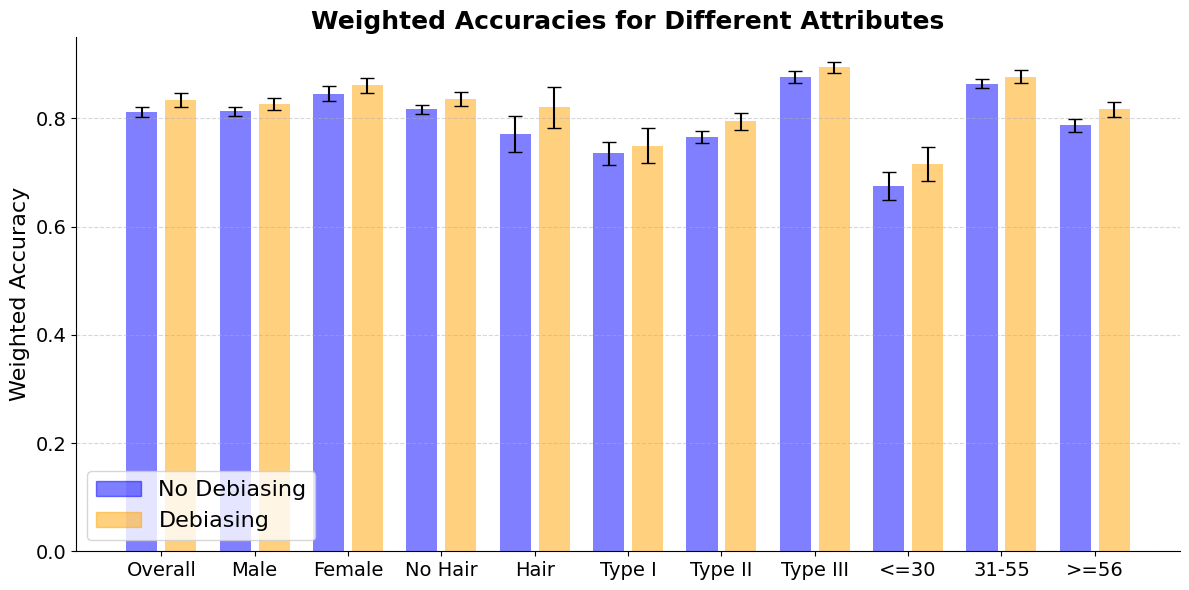

[0.0006356213932157573, 0.0007113576874237637, 0.0016116577676701382, 0.0008592510753610228, 0.005684262411385532, 0.005844331110063195, 0.009278206058690466, 0.0069519847655184226]


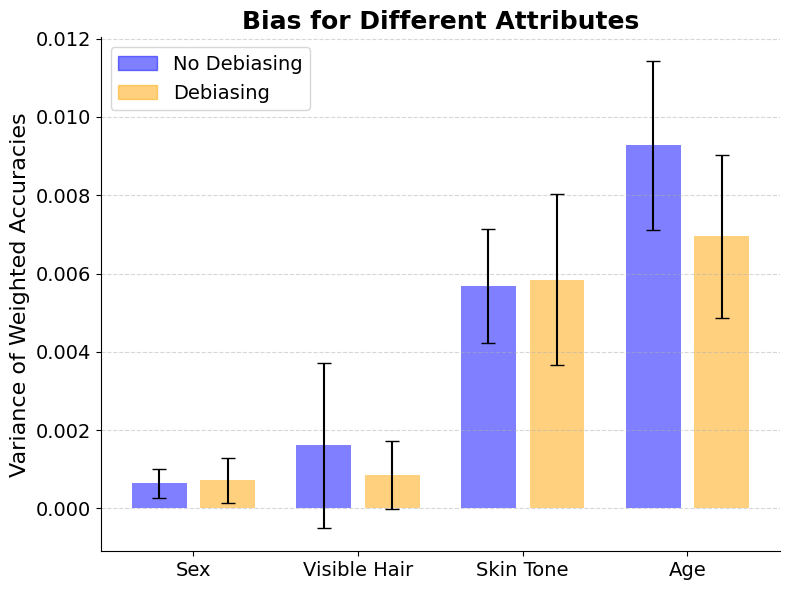

In [10]:
bar_chart_accuracies(transfer_results, transfer_binary, transfer_binary_debias, "transfer_binary_accuracies")

bar_chart_biases(transfer_results, transfer_binary, transfer_binary_debias, "transfer_binary_biases")

[0.7169444501399994, 0.7866666615009308, 0.7482546150684357, 0.797741276025772, 0.7847006916999817, 0.8481153249740601, 0.7254963397979737, 0.7945663392543793, 0.6504065155982971, 0.7252032637596131, 0.5571428596973419, 0.6730158746242523, 0.6429473578929901, 0.739789468050003, 0.8323590874671936, 0.8630480229854584, 0.5152777969837189, 0.6645833432674408, 0.8147272586822509, 0.8709090828895569, 0.6528497338294983, 0.7121761560440063]


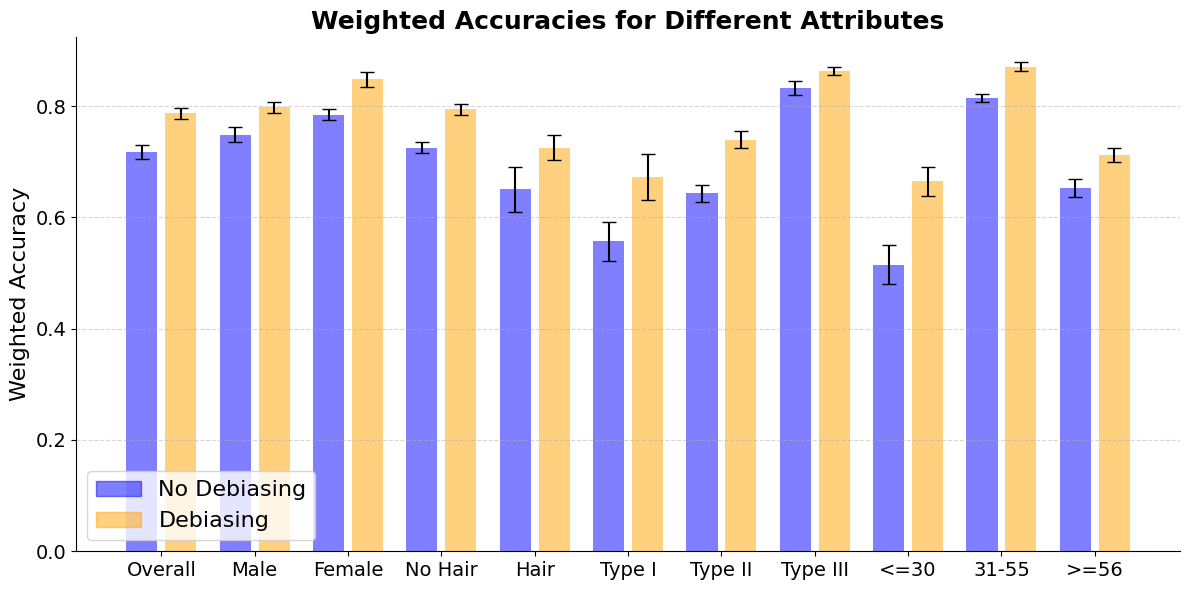

[0.0007804752607908583, 0.0013685978757722594, 0.003369434806980465, 0.0025812489919205817, 0.020281547336311215, 0.00989355995056253, 0.022817245075080688, 0.011845688542718353]


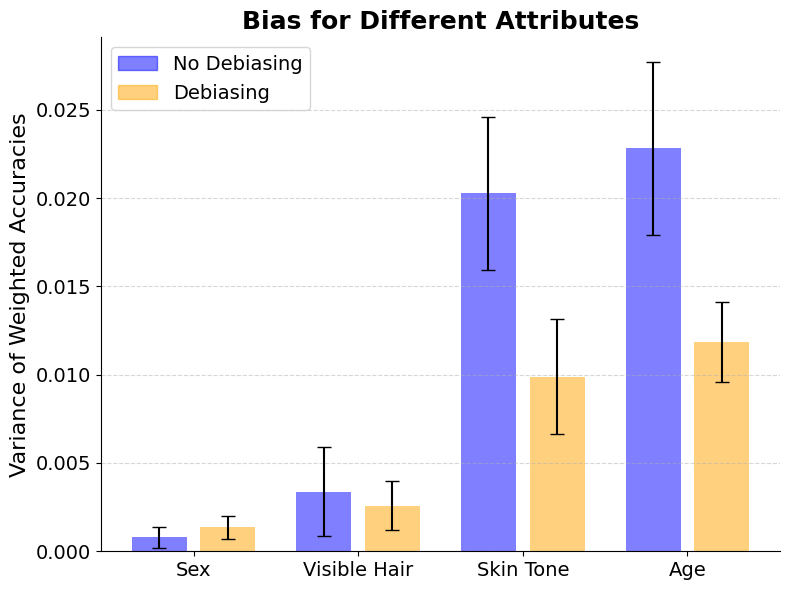

In [12]:
bar_chart_accuracies(simple_binary_results, simple_binary, simple_binary_debias, "simple_binary_accuracies")
bar_chart_biases(simple_binary_results, simple_binary, simple_binary_debias, "simple_binary_biases")



[0.7979965448379517, 0.7951785147190094, 0.7469047784805298, 0.7354761779308319, 0.6579667627811432, 0.6875855445861816, 0.7356295645236969, 0.7243119060993195, 0.8809843242168427, 0.8781481504440307]


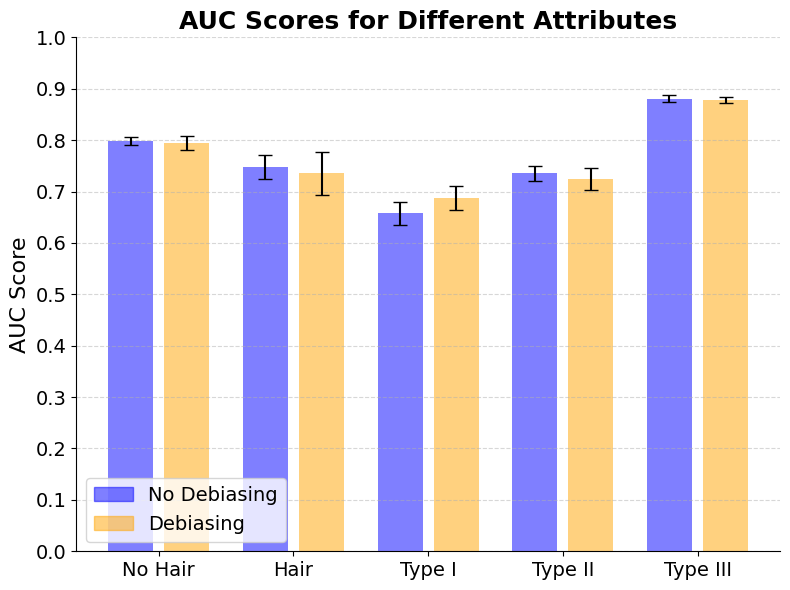

[0.8817131698131562, 0.8857176423072814, 0.850000011920929, 0.8295767128467559, 0.7428478360176086, 0.7562072396278381, 0.8147354125976562, 0.8183166086673737, 0.9456823527812958, 0.9416282951831818]


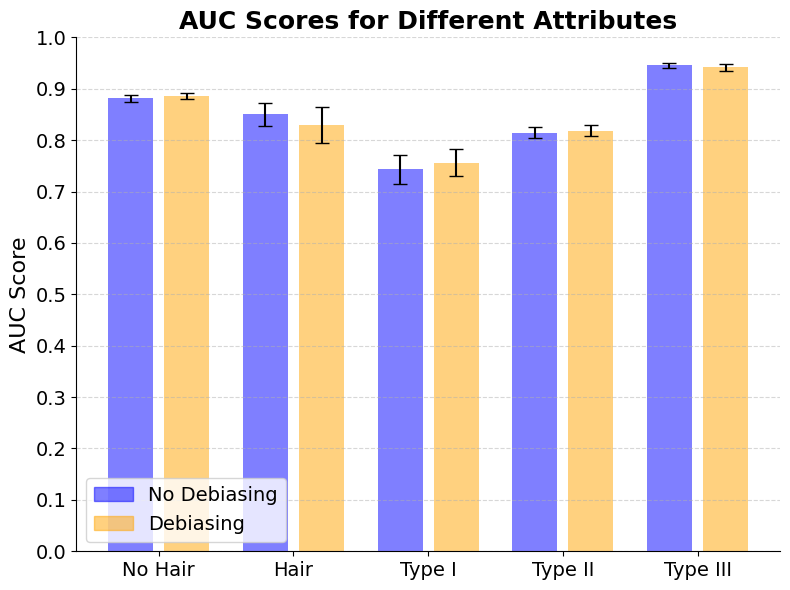

In [13]:
bar_chart_auc_scores(auc_simple_binary2, simple_binary, simple_binary_debias, "simple_binary_auc")
bar_chart_auc_scores(auc_simple_binary, simple_binary, simple_binary_debias, "simple_binary_auc2")

[0.5678417265415192, 0.5633093595504761, 0.6250409185886383, 0.6147299647331238, 0.6254237115383148, 0.6058380365371704, 0.5802610039710998, 0.572675371170044, 0.4749999940395355, 0.4932926774024963, 0.3797687768936157, 0.35202311873435976, 0.4894563347101212, 0.48747941553592683, 0.6991803348064423, 0.6986885249614716, 0.29869282245635986, 0.311764720082283, 0.7123762428760528, 0.7041254103183746, 0.49429475963115693, 0.4890649735927582]


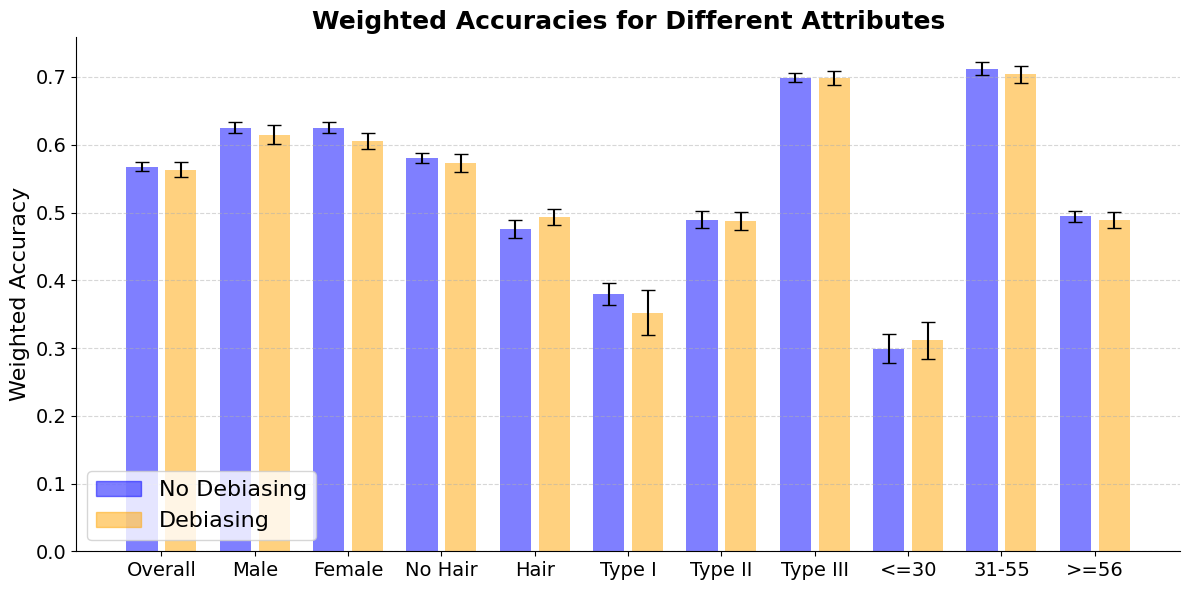

[3.18314757070226e-05, 9.021751661819621e-05, 0.005653829953371048, 0.0033080627519952444, 0.02648383693407791, 0.03083290630731656, 0.042999411820668534, 0.0387942450266445]


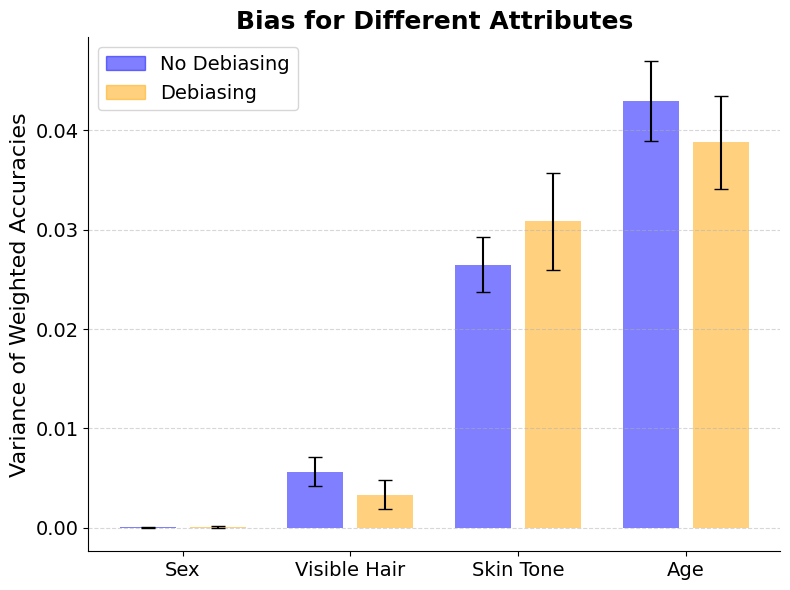

In [56]:
bar_chart_accuracies(multi_results, multi, multi_debias, "multi_accuracies")
bar_chart_biases(multi_results, multi, multi_debias, "multi_biases")

In [57]:
from scipy.stats import mannwhitneyu

def get_values(results, debias_runs, runs, key):
    values = []
    for run in runs:
        value = results[run][key]
        values.append(value)
        
    debias_values = []
    for run in debias_runs:
        value = results[run][key]
        debias_values.append(value)
    
    return values, debias_values

def perform_mwus(results, debias_runs, runs):
    bias_keys = ["gender_bias", "hairiness_bias", "skin_tone_bias", "age_bias"]
    for key in bias_keys:
        values, debias_values = get_values(results, debias_runs, runs, key)
        print(f"MWU test for attribute {key}")
        statistic, p_value = mannwhitneyu(debias_values, values)
        print(f"{statistic} {p_value}")
        alpha = 0.05 / 12.0
        if p_value < alpha:
            print("H0 rejected")
        else:
            print("H0 accepted")

In [58]:
perform_mwus(simple_binary_results, simple_binary_debias, simple_binary)

MWU test for attribute gender_bias
74.0 0.07566157214388704
H0 accepted
MWU test for attribute hairiness_bias
46.0 0.7913367801006604
H0 accepted
MWU test for attribute skin_tone_bias
3.0 0.00043963875262656454
H0 rejected
MWU test for attribute age_bias
1.0 0.00024612812790522973
H0 rejected


In [59]:
perform_mwus(transfer_results, transfer_binary_debias, transfer_binary)

MWU test for attribute gender_bias
51.0 0.9698499769931556
H0 accepted
MWU test for attribute hairiness_bias
44.0 0.6775849579524755
H0 accepted
MWU test for attribute skin_tone_bias
52.0 0.9097218891455553
H0 accepted
MWU test for attribute age_bias
24.0 0.053902557169387175
H0 accepted


In [60]:
perform_mwus(multi_results, multi_debias, multi)

MWU test for attribute gender_bias
58.0 0.570605503511469
H0 accepted
MWU test for attribute hairiness_bias
14.0 0.00728455700947966
H0 accepted
MWU test for attribute skin_tone_bias
79.0 0.031209012771740218
H0 accepted
MWU test for attribute age_bias
27.0 0.08897301170181328
H0 accepted


In [61]:
def bar_chart_accuracies2(chart_name="transfer_with_binary_accuracies"):
    values1, error1 = get_accuracies(transfer_results, transfer_binary, transfer_binary_debias)
    values2, error2 = get_accuracies(simple_binary_results, simple_binary, simple_binary_debias)
    values = []
    error = []
    for i in range(11):
        values.append(values2[2*i+1])
        values.append(values1[2*i])
        values.append(values1[2*i+1])
        error.append(error2[2*i+1])
        error.append(error1[2*i])
        error.append(error1[2*i+1])
    
    print(values)

    captions = ["Overall", "Male", "Female", "No Hair", "Hair", "Type I", "Type II", "Type III", "<=30", "31-55", ">=56"]

    
    fig, ax = plt.subplots(figsize=(12, 6))

    colors = ['green', 'blue', 'orange'] * (len(values) // 3)
    bar_width = 0.1
    x_pos = np.arange(len(captions)*3)
    bar_positions = x_pos + np.arange(len(x_pos)) // 3 * bar_width - (len(x_pos) // 3) * bar_width / 3

    for i in range(len(values)):
        ax.bar(bar_positions[i], values[i], yerr=error[i], align='center', alpha=0.5, ecolor='black',
               capsize=5, color=colors[i], label=colors[i])

    x_ticks_pos = np.zeros(len(captions))
    for i in range(len(x_ticks_pos)):
        x_ticks_pos[i] = (bar_positions[i*3] + bar_positions[i*3+2]) / 2.0
        
    ax.set_ylabel('Weighted Accuracy', fontsize=16)
    ax.set_xticks(x_ticks_pos)
    ax.set_xticklabels(captions, fontsize=14)
    ax.set_title('Weighted Accuracies for Different Attributes', fontsize=18, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.tick_params(axis='y', labelsize=14)
    

    blue_patch = mpatches.Patch(color='blue', alpha=0.5, label='No Debiasing with pretrained weights')
    orange_patch = mpatches.Patch(color='orange', alpha= 0.5,label='Debiasing with pretrained weights')
    green_patch = mpatches.Patch(color='green', alpha= 0.5,label='No Debiasing without pretrained weights')

    ax.legend(handles=[green_patch, blue_patch, orange_patch], loc='lower left', framealpha=1.0, fontsize=14)

    plt.tight_layout()
    plt.savefig(f"{chart_name}.png")
    plt.show()
    
def bar_chart_biases2(chart_name="transfer_with_binary_bias"):
    
    values1, error1 = get_biases(transfer_results, transfer_binary, transfer_binary_debias)
    values2, error2 = get_biases(simple_binary_results, simple_binary, simple_binary_debias)
    values = []
    error = []
    for i in range(4):
        values.append(values2[2*i+1])
        values.append(values1[2*i])
        values.append(values1[2*i+1])
        error.append(error2[2*i+1])
        error.append(error1[2*i])
        error.append(error1[2*i+1])
        
    
    print(values)

    captions = ["Sex", "Visible Hair", "Skin Tone", "Age"]
    fig, ax = plt.subplots(figsize=(8, 6))
    
    colors = ['green', 'blue', 'orange'] * (len(values) // 3)
    bar_width = 0.3
    x_pos = np.arange(len(values))
    bar_positions = x_pos + np.arange(len(x_pos)) // 3 * bar_width - (len(x_pos) // 3) * bar_width / 3

    for i in range(len(values)):
        ax.bar(bar_positions[i], values[i], yerr=error[i], align='center', alpha=0.5, ecolor='black',
               capsize=5, color=colors[i], label=colors[i])

    x_ticks_pos = np.zeros(len(captions))
    for i in range(len(x_ticks_pos)):
        x_ticks_pos[i] = (bar_positions[i*3] + bar_positions[i*3+2]) / 2.0
    
    ax.set_ylabel('Variance of Weighted Accuracies', fontsize=16)
    ax.set_xticks(x_ticks_pos)
    ax.set_xticklabels(captions, fontsize=14)
    ax.set_title('Bias for Different Attributes', fontsize=18, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.tick_params(axis='y', labelsize=14)

    blue_patch = mpatches.Patch(color='blue', alpha=0.5, label='No Debiasing with pretrained weights')
    orange_patch = mpatches.Patch(color='orange', alpha= 0.5,label='Debiasing with pretrained weights')
    green_patch = mpatches.Patch(color='green', alpha= 0.5,label='No Debiasing without pretrained weights')

    ax.legend(handles=[green_patch, blue_patch, orange_patch], loc='upper left', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{chart_name}.png")
    plt.show()

[0.7866666615009308, 0.8110185146331788, 0.8336111068725586, 0.797741276025772, 0.8125256717205047, 0.8266940414905548, 0.8481153249740601, 0.8456762969493866, 0.8607538938522339, 0.7945663392543793, 0.8161964416503906, 0.8353187143802643, 0.7252032637596131, 0.7707316994667053, 0.8203251838684082, 0.6730158746242523, 0.7349206507205963, 0.7492063760757446, 0.739789468050003, 0.765263170003891, 0.7947368562221527, 0.8630480229854584, 0.8764091908931733, 0.894363272190094, 0.6645833432674408, 0.6743055701255798, 0.7152777791023255, 0.8709090828895569, 0.8636363327503205, 0.8763636291027069, 0.7121761560440063, 0.7870466232299804, 0.8168393790721893]


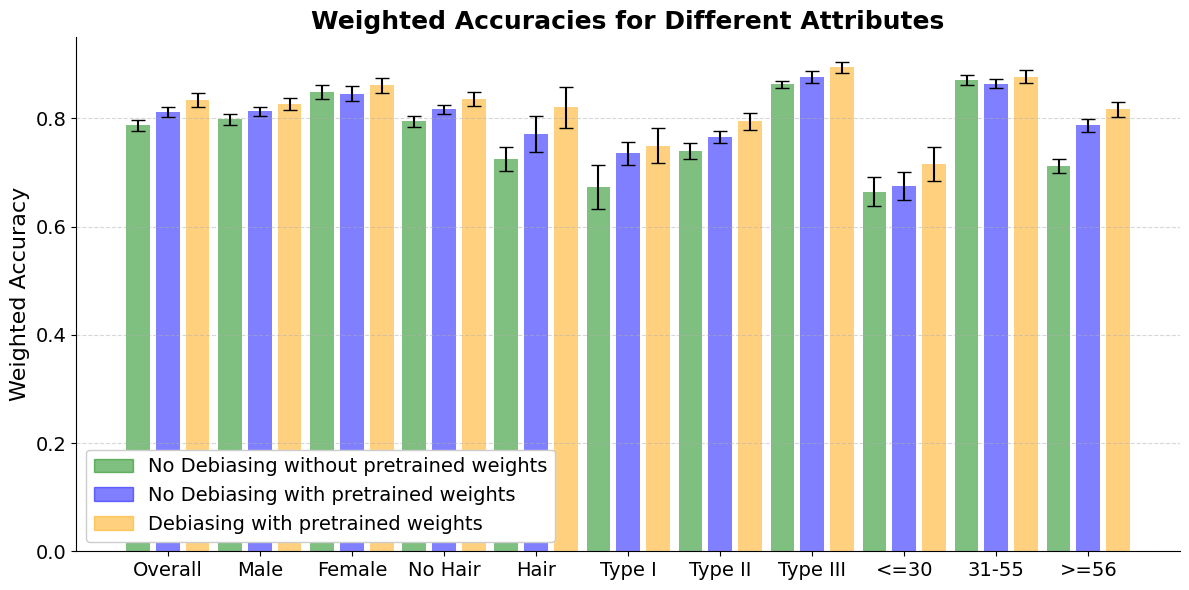

[0.0013685978757722594, 0.0006356213932157573, 0.0007113576874237637, 0.0025812489919205817, 0.0016116577676701382, 0.0008592510753610228, 0.00989355995056253, 0.005684262411385532, 0.005844331110063195, 0.011845688542718353, 0.009278206058690466, 0.0069519847655184226]


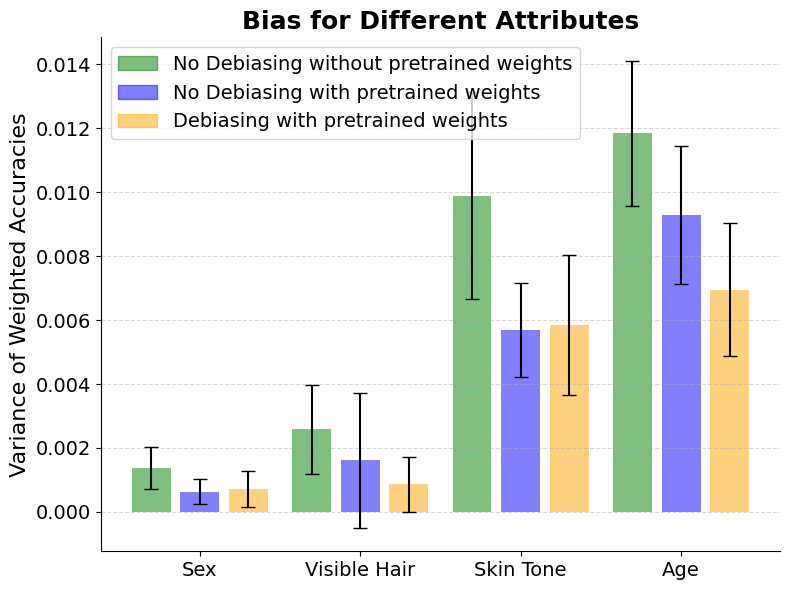

In [62]:
bar_chart_accuracies2()
bar_chart_biases2()